# ANALYSIS ON SALES DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.reset_option('max_columns')
%matplotlib inline  

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
#checking the shape 
df.shape

(9800, 18)

In [7]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
#checking for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


# OBSERVATION:-
The null values in the postal code are only in city = Burlington and State=Vermont

In [10]:
#changing the postal code with 5401
df['Postal Code']=df['Postal Code'].fillna(5401)

# CONCLUSION:-
So, changing the postal code with 5401 which i searched from google as the postal code of city = Burlington and State=Vermont

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
#Changing the data type of Postal Code from Float To Int
df['Postal Code']=df['Postal Code'].astype(int)

In [13]:
#changing the dtype order date and shi date from object to date time format
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int32         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
#Creating a new column for the delivery time(Time to get the order to be delivered)
df['Delivery Time']=df['Ship Date']-df['Order Date']

In [17]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4 days


In [18]:
#Checking for duplicated rows
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time


# THINGS THAT HAD BEEN PERFROMED JUST BEFORE THE EDA:--
1.Changed the null values with 5401(which i found in google as the pincode)                                                      
2.Changed the data type of postal code to int , order date and ship date to date time 

3.Inserted a new column (dilivery time) which is difference between ship date and order date

4.Check for Duplicated columns. 

In [19]:
#sorting on the base of order date
df.sort_values(by=['Order Date'],inplace=True)

In [20]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days


In [21]:
#different shiping modes
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

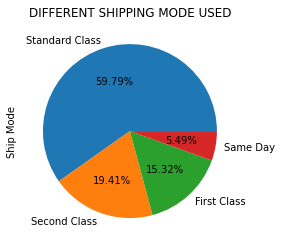

In [22]:
df['Ship Mode'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("DIFFERENT SHIPPING MODE USED")
plt.show()

# CONCLUSION
__Standard Class__ is the biggest Ship Mode among the others (Standard Class,Same Day,First Class,Second Class) around ___59.79 %___

<hr style="border:1px solid gray">

In [23]:
#diffenrent segments
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

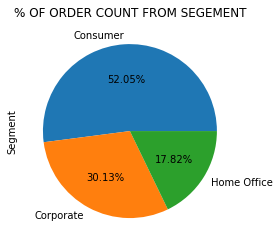

In [24]:
df['Segment'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("% OF ORDER COUNT FROM SEGEMENT")
plt.show()

# CONCLUSION
__Consumer segment__ is the biggest segment among (Corporate,Home Office and Consumer)

<hr style="border:1px solid gray">

In [25]:
#Different Countries
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

# CONCLUSION
All the Sales are from __USA__.

<hr style="border:1px solid gray">

In [26]:
#Diffenerent Cities
df['City'].value_counts()

New York City      891
Los Angeles        728
Philadelphia       532
San Francisco      500
Seattle            426
                  ... 
San Luis Obispo      1
Manhattan            1
Iowa City            1
Baytown              1
East Orange          1
Name: City, Length: 529, dtype: int64

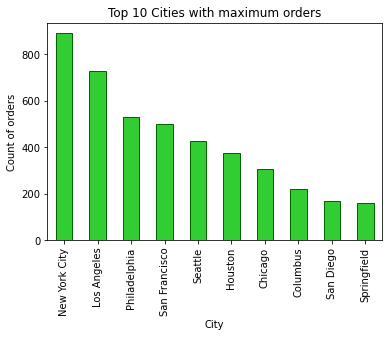

In [27]:
#Top 10 cities with the maximum Orders
df['City'].value_counts().head(10).plot.bar(color='#32CD32',edgecolor='#006400')
plt.xlabel("City")
plt.ylabel('Count of orders')
plt.title("Top 10 Cities with maximum orders")
plt.show()

# CONCLUSION
As, we can see that that maximim orders are from the  __New York City__ with ___891___ orders counts

<hr style="border:1px solid gray">

In [28]:
#Top states with maximum orders
df['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Massachusetts            135
Indiana                  135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

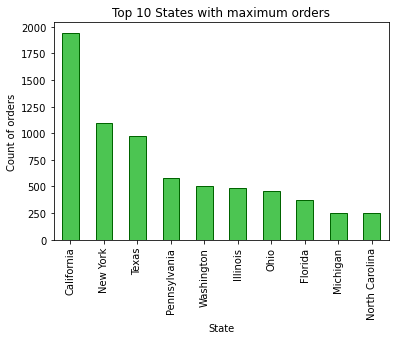

In [29]:
#Top 10 States with maximum orders
df['State'].value_counts().head(10).plot.bar(color='#4CC552',edgecolor='#006400')
plt.xlabel("State")
plt.ylabel('Count of orders')
plt.title("Top 10 States with maximum orders")
plt.show()

# CONCLUSION
So the maximum amount of orders received is from the State of __California__  ___(1946 orders)___

<hr style="border:1px solid gray">

In [30]:
#Orders on the base of Regions
df['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

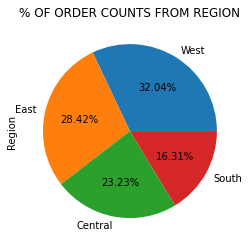

In [31]:
df['Region'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('% OF ORDER COUNTS FROM REGION')
plt.show()

# CONCLUSION
Maximum orders are recieved from the __West Region__ ___(3140 orders)___ around ___32.04 %___

<hr style="border:1px solid gray">

In [32]:
#Categories orders count
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

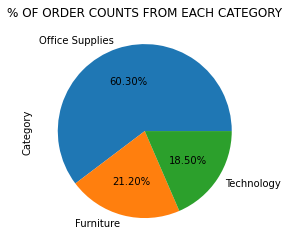

In [33]:
df['Category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('% OF ORDER COUNTS FROM EACH CATEGORY')
plt.show()

# CONCLUSION
Maximum Orders are from the __Office supplies__ ___(5909 orders)___ around ___60.30 %___

<hr style="border:1px solid gray">

In [34]:
#Sub-Category with maximum orders
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

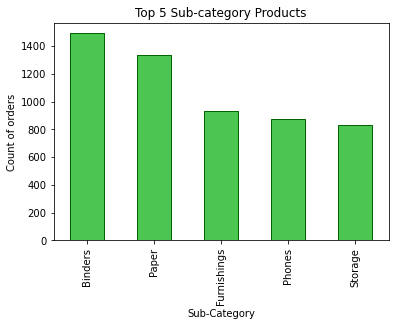

In [35]:
#top 5 sub-category orders
df['Sub-Category'].value_counts().head(5).plot.bar(color='#4CC552',edgecolor='#006400')
plt.xlabel("Sub-Category")
plt.ylabel('Count of orders')
plt.title("Top 5 Sub-category Products")
plt.show()

# CONCLUSION
 Maximum orders:-<br>
 __Blinders__  ___(with 1492 orders)___ <br>
 followed by __Papers__ ___(with 1338 orders)___

<hr style="border:1px solid gray">

In [36]:
#Product Name orders count
df['Product Name'].value_counts()

Staple envelope                                                            47
Staples                                                                    46
Easy-staple paper                                                          44
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    18
                                                                           ..
Vtech AT&T CL2940 Corded Speakerphone, Black                                1
Avery 484                                                                   1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Eldon File Chest Portable File                                              1
Acco Glide Clips                                                            1
Name: Product Name, Length: 1849, dtype: int64

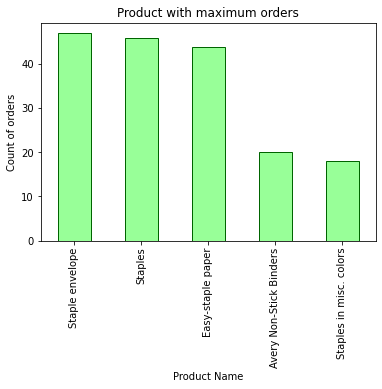

In [37]:
df['Product Name'].value_counts().head(5).plot.bar(color='#98FF98',edgecolor='#006400')
plt.xlabel("Product Name")
plt.ylabel('Count of orders')
plt.title("Product with maximum orders")
plt.show()

# CONCLUSION
__Staple envelope__ has the maximum no of order ___(47 orders)___

<hr style="border:1px solid gray">

In [38]:
#Customers with maximum orders
df['Customer Name'].value_counts()

William Brown        35
Matt Abelman         34
Paul Prost           34
John Lee             33
Seth Vernon          32
                     ..
Sung Chung            1
Anthony O'Donnell     1
Lela Donovan          1
Jocasta Rupert        1
Ricardo Emerson       1
Name: Customer Name, Length: 793, dtype: int64

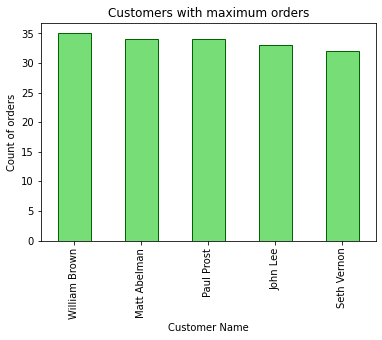

In [39]:
df['Customer Name'].value_counts().head(5).plot.bar(color="#77DD77",edgecolor='#006400')
plt.xlabel("Customer Name")
plt.ylabel('Count of orders')
plt.title("Customers with maximum orders")
plt.show()

# CONCLUSION
So, from where we can say that __William Brown__ has the odered the maximum times ___(35 times)___ , followed by __Matt Abelman__ ___(34 times)___

<hr style="border:1px solid gray">

In [40]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days


In [41]:
#Top Segment in term of sales
top_SEGMENT = df.groupby(['Segment']).sum().sort_values('Sales', ascending=False).head(10)
top_SEGMENT = top_SEGMENT[['Sales']].round(2)
top_SEGMENT.reset_index(inplace=True)
top_SEGMENT

,Segment,Sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


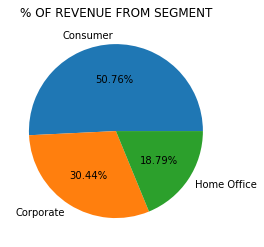

In [42]:
plt.pie(top_SEGMENT['Sales'], labels=top_SEGMENT['Segment'], autopct='%1.2f%%')
plt.title('% OF REVENUE FROM SEGMENT')
plt.show()

So, the Highest Revenue is earned from the __Consumer segment__ with ___$1148060.53___


In [43]:
#Top 10 states in term of sales
top_10_states = df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_10_states = top_10_states[['Sales']].round(2)
top_10_states.reset_index(inplace=True)
top_10_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


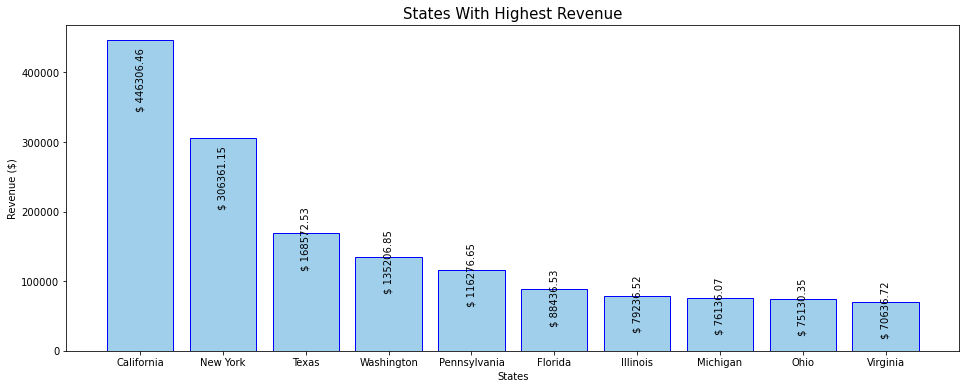

In [44]:
plt.figure(figsize=(16,6))
plt.bar(top_10_states['State'],top_10_states['Sales'] ,color="#A0CFEC" , edgecolor='blue')
plt.title('States With Highest Revenue',fontsize=15)
plt.xlabel('States',fontsize=10)
plt.ylabel('Revenue ($)',fontsize=10)

for k , v in top_10_states['Sales'].items(): 
    if v > 200000 : 
        plt.text(k,v-100000,"$ "+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-50000,"$ "+str(v),rotation=90,horizontalalignment='center')

# CONCLUSION
So, the Highest Revenue is earned from the state of __California__ with ___$446306.46___

<hr style="border:1px solid gray">

In [45]:
#States with least Revenues
bottom_10_states = df.groupby(['State']).sum().sort_values('Sales', ascending=True).head(10)
bottom_10_states = bottom_10_states[['Sales']].round(2)
bottom_10_states.reset_index(inplace=True)
bottom_10_states

,State,Sales
0,North Dakota,919.91
1,West Virginia,1209.82
2,Maine,1270.53
3,South Dakota,1315.56
4,Wyoming,1603.14
5,District of Columbia,2865.02
6,Kansas,2914.31
7,Idaho,4382.49
8,Iowa,4443.56
9,New Mexico,4783.52


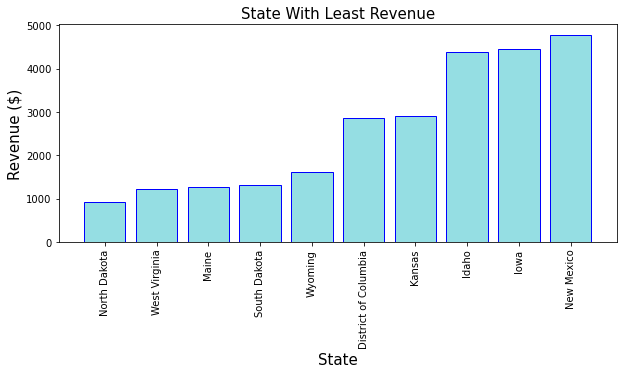

In [46]:
plt.figure(figsize=(10,4))
plt.bar(bottom_10_states['State'],bottom_10_states['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('State With Least Revenue',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)
plt.show()

# CONCLUSION
__North Dakota__ is the state with least revenue ___$ 919.91___

<hr style="border:1px solid gray">

In [47]:
#Top 10 Cities with maximum Revenue Earned
top_10_cities = df.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_10_cities = top_10_cities[['Sales']].round(2)
top_10_cities.reset_index(inplace=True)
top_10_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


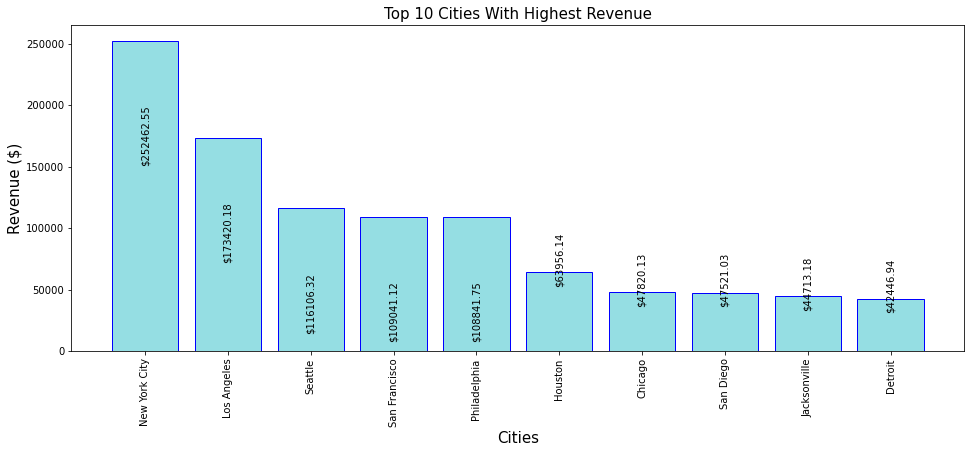

In [48]:
plt.figure(figsize=(16,6))
plt.bar(top_10_cities['City'],top_10_cities['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Top 10 Cities With Highest Revenue',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

for k , v in top_10_cities['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

# CONCLUSION
So, the City from which the highest Revenue is earned is from __New York City__ , ___$252462.55___

<hr style="border:1px solid gray">

In [49]:
#Cities with least revenues
bottom_10_cities = df.groupby(['City']).sum().sort_values('Sales', ascending=True).head(10)
bottom_10_cities = bottom_10_cities[['Sales']].round(2)
bottom_10_cities.reset_index(inplace=True)
bottom_10_cities

,City,Sales
0,Abilene,1.39
1,Elyria,1.82
2,Jupiter,2.06
3,Pensacola,2.21
4,Ormond Beach,2.81
5,San Luis Obispo,3.62
6,Springdale,4.30
7,Layton,4.96
8,Keller,6.00
9,Missouri City,6.37


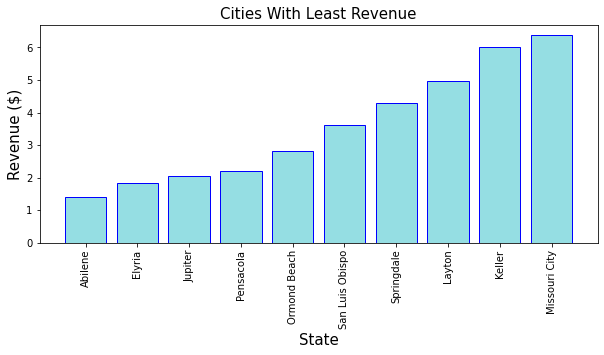

In [50]:
plt.figure(figsize=(10,4))
plt.bar(bottom_10_cities['City'],bottom_10_cities['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Cities With Least Revenue',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)
plt.show()

# CONCLUSION
__Abilene__ is the city with least revenue provided ___$ 1.39___

<hr style="border:1px solid gray">

In [51]:
#Top 10 Customer from which highest Revenue is earned
top_10_custmoers = df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_10_custmoers = top_10_custmoers[['Sales']].round(2)
top_10_custmoers.reset_index(inplace=True)
top_10_custmoers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


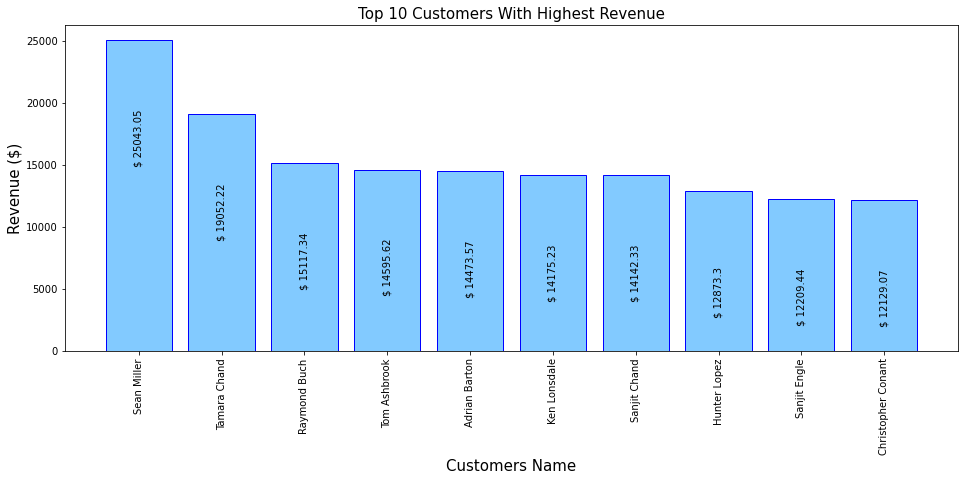

In [52]:
plt.figure(figsize=(16,6))
plt.bar(top_10_custmoers['Customer Name'],top_10_custmoers['Sales'] ,color="#82CAFF" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Top 10 Customers With Highest Revenue',fontsize=15)
plt.xlabel('Customers Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

for k , v in top_10_custmoers['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$ "+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$ "+str(v),rotation=90,horizontalalignment='center')
        

# CONCLUSION
So, __Sean Miller__ is the customer from which highest revenue is earned i.e, ___$ 25043.05___

<hr style="border:1px solid gray">

In [53]:
#Customer with least revenue
bottom_10_custmoers = df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=True).head(10)
bottom_10_custmoers = bottom_10_custmoers[['Sales']].round(2)
bottom_10_custmoers.reset_index(inplace=True)
bottom_10_custmoers

,Customer Name,Sales
0,Thais Sissman,4.83
1,Lela Donovan,5.30
2,Sung Chung,14.11
3,Carl Jackson,16.52
4,Mitch Gastineau,16.74
5,Roy Skaria,22.33
6,Susan Gilcrest,47.95
7,Ricardo Emerson,48.36
8,Ionia McGrath,48.40
9,Larry Blacks,50.19


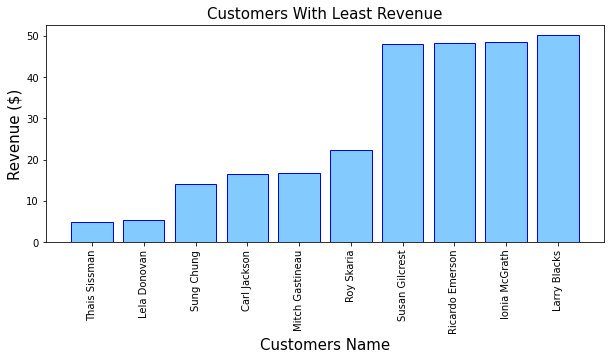

In [54]:
plt.figure(figsize=(10,4))
plt.bar(bottom_10_custmoers['Customer Name'],bottom_10_custmoers['Sales'] ,color="#82CAFF" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Customers With Least Revenue',fontsize=15)
plt.xlabel('Customers Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)
plt.show()

# CONCLUSION
__Thais Sissman__ is the customer with leat revenue genarated ___ $ 4.83___

<hr style="border:1px solid gray">

In [55]:
#Revenue from categories
top_categories = df.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_categories = top_categories[['Sales']].round(2)
top_categories.reset_index(inplace=True)
top_categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


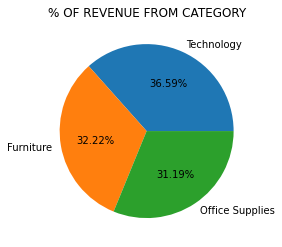

In [56]:
plt.pie(top_categories['Sales'], labels=top_categories['Category'], autopct='%1.2f%%')
plt.title('% OF REVENUE FROM CATEGORY')
plt.show()

# CONCLUSION
So, the highest revenue earned from category is from __Technology__ , i.e ___$ 827455.87 (36.59%)___

<hr style="border:1px solid gray">

In [57]:
#top 10 Highest Revenue from product
top_products = df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)
top_products = top_products[['Sales']].round(2)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


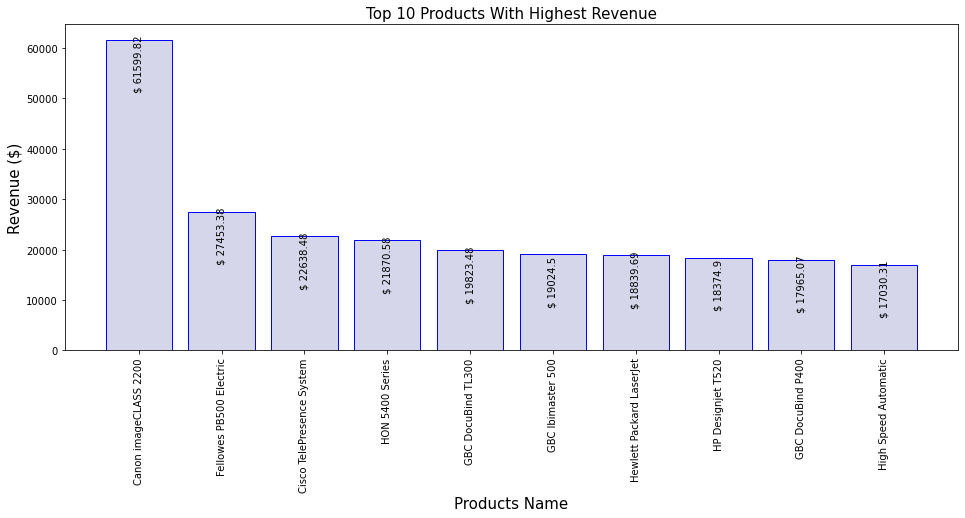

In [58]:
plt.figure(figsize=(16,6))
plt.bar(top_products['Product Name'].str.split(' ').str[0:3].str.join(' '),top_products['Sales'] ,color="#D5D6EA" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Top 10 Products With Highest Revenue',fontsize=15)
plt.xlabel('Products Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

for k , v in top_products['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$ "+str(v),rotation=90,horizontalalignment='centre')
    else:
        plt.text(k,v-10000,"$ "+str(v),rotation=90,horizontalalignment='center')

In [59]:
letter=top_products['Product Name'].str.split(' ').str[0:3].str.join(' ')

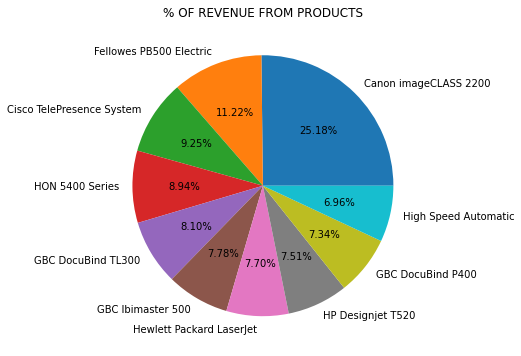

In [60]:
plt.figure(figsize=(16,6))
plt.pie(top_products['Sales'], labels=letter, autopct='%1.2f%%')
plt.title('% OF REVENUE FROM PRODUCTS')
plt.show()

# CONCLUSION
So,the highest revenue is earned from the __Canon imageCLASS 2200__ ,i.e ___$ 61599.82 (28.18%)___

<hr style="border:1px solid gray">

In [61]:
#Product with least revenue
bottom_products = df.groupby(['Product Name']).sum().sort_values('Sales', ascending=True).head(10)
bottom_products = bottom_products[['Sales']].round(2)
bottom_products.reset_index(inplace=True)
bottom_products

,Product Name,Sales
0,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.62
1,Avery 5,5.76
2,Xerox 20,6.48
3,Grip Seal Envelopes,7.07
4,Acme Serrated Blade Letter Opener,7.63
5,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.70
6,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.80
7,Xerox 1989,7.97
8,4009 Highlighters,8.04
9,Stockwell Gold Paper Clips,8.10


Text(0, 0.5, 'Revenue ($)')

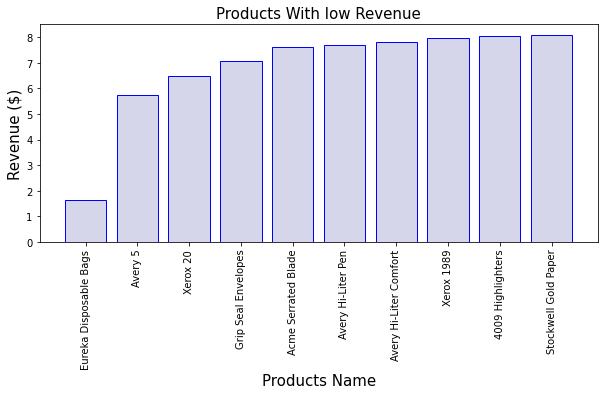

In [62]:
plt.figure(figsize=(10,4))
plt.bar(bottom_products['Product Name'].str.split(' ').str[0:3].str.join(' '),bottom_products['Sales'] ,color="#D5D6EA" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Products With low Revenue',fontsize=15)
plt.xlabel('Products Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

# CONCLUSION
__Eureka Disposable Bags__ is the product with least revenue generated ___$ 1.62___

<hr style="border:1px solid gray">

In [63]:
#Top 10 revenue from Sub-Category
top_sub_category = df.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)
top_sub_category = top_sub_category[['Sales']].round(2)
top_sub_category.reset_index(inplace=True)
top_sub_category

,Sub-Category,Sales
0,Phones,327782.45
1,Chairs,322822.73
2,Storage,219343.39
3,Tables,202810.63
4,Binders,200028.78
5,Machines,189238.63
6,Accessories,164186.70
7,Copiers,146248.09
8,Bookcases,113813.20
9,Appliances,104618.40


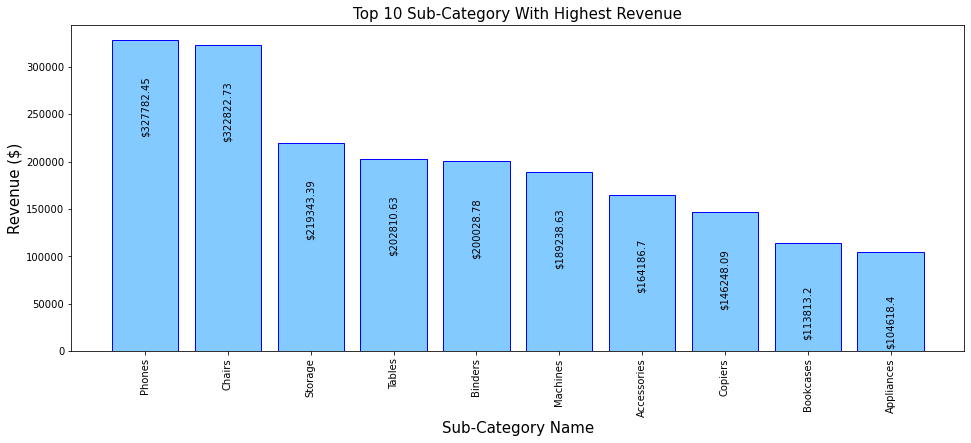

In [64]:
plt.figure(figsize=(16,6))
plt.bar(top_sub_category['Sub-Category'],top_sub_category['Sales'] ,color="#82CAFF" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Top 10 Sub-Category With Highest Revenue',fontsize=15)
plt.xlabel('Sub-Category Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

for k , v in top_sub_category['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

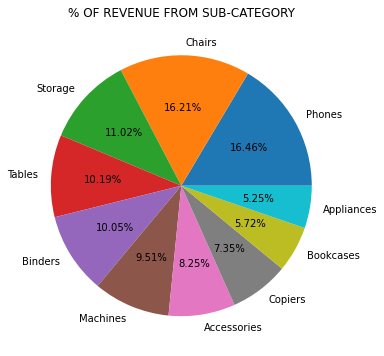

In [65]:
plt.figure(figsize=(14,6))
plt.pie(top_sub_category['Sales'], labels=top_sub_category['Sub-Category'], autopct='%1.2f%%')
plt.title('% OF REVENUE FROM SUB-CATEGORY')
plt.show()

# CONCLUSION
So,the highest revenue earned from Sub-Category is from __Phones__ ,i.e ___$327782.45 (16.46%)___

<hr style="border:1px solid gray">

In [66]:
#least revenue from sub-category
bottom_sub_category = df.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=True).head(10)
bottom_sub_category = bottom_sub_category[['Sales']].round(2)
bottom_sub_category.reset_index(inplace=True)
bottom_sub_category

,Sub-Category,Sales
0,Fasteners,3001.96
1,Labels,12347.73
2,Envelopes,16128.05
3,Art,26705.41
4,Supplies,46420.31
5,Paper,76828.30
6,Furnishings,89212.02
7,Appliances,104618.40
8,Bookcases,113813.20
9,Copiers,146248.09


Text(0, 0.5, 'Revenue ($)')

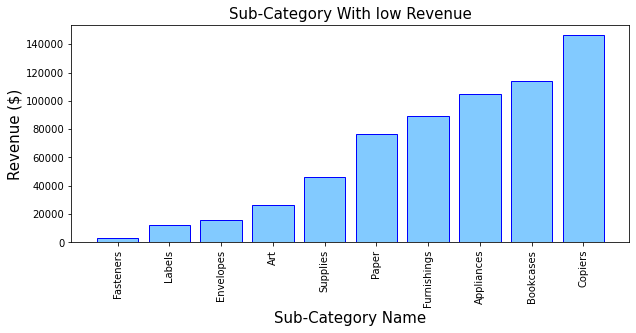

In [67]:
plt.figure(figsize=(10,4))
plt.bar(bottom_sub_category['Sub-Category'],bottom_sub_category['Sales'] ,color="#82CAFF" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Sub-Category With low Revenue',fontsize=15)
plt.xlabel('Sub-Category Name',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

# CONCLUSION
__Fasteners__ is the sub-category product with least revenue generated of ___ $ 3001.96___

<hr style="border:1px solid gray">

In [68]:
#sales on base of regions
top_region = df.groupby(['Region']).sum().sort_values('Sales', ascending=False)
top_region = top_region[['Sales']].round(2)
top_region.reset_index(inplace=True)
top_region

,Region,Sales
0,West,710219.68
1,East,669518.73
2,Central,492646.91
3,South,389151.46


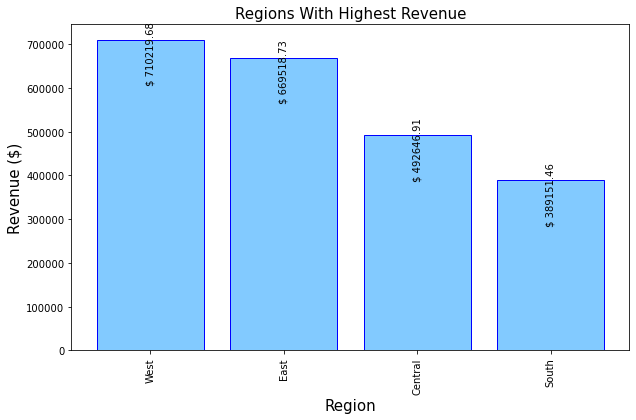

In [69]:
plt.figure(figsize=(10,6))
plt.bar(top_region['Region'],top_region['Sales'] ,color="#82CAFF" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Regions With Highest Revenue',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Revenue ($)',fontsize=15)

for k , v in top_region['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$ "+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$ "+str(v),rotation=90,horizontalalignment='center')

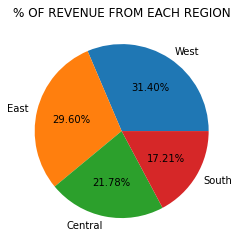

In [70]:
plt.figure(figsize=(14,4))
plt.pie(top_region['Sales'], labels=top_region['Region'], autopct='%1.2f%%')
plt.title('% OF REVENUE FROM EACH REGION')
plt.show()

# CONCLUSION
So, the __West__ region provides the maximum sales of ___$ 710219.68 (31.40%)___

<hr style="border:1px solid gray">

In [71]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days


In [72]:
#creating new columns of day,month and year
df['Day']=df['Order Date'].dt.day
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year

In [73]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Day,Month,Year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days,4,1,2015


In [74]:
#orders in each year
df['Year'].value_counts()

2018    3258
2017    2534
2016    2055
2015    1953
Name: Year, dtype: int64

Text(0.5, 1.0, 'No of orders in Respective Years')

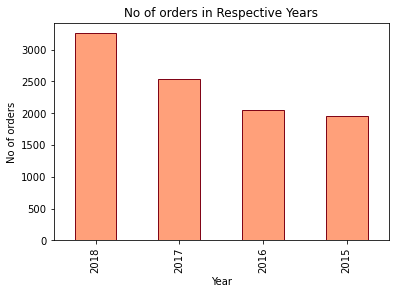

In [75]:
df['Year'].value_counts().plot.bar(color='#FFA07A',edgecolor='#800517')
plt.xlabel("Year")
plt.ylabel("No of orders")
plt.title("No of orders in Respective Years")

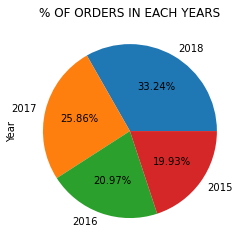

In [76]:
df['Year'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("% OF ORDERS IN EACH YEARS")
plt.show()

# CONCLUSION
No of orders in the year __2018__ is the highest orders of ___3258___ which is around ___33.24 %___ of the total Sales

<hr style="border:1px solid gray">

In [77]:
#Orders in each month
df['Month'].value_counts()

11    1449
12    1382
9     1354
10     809
5      725
7      697
8      693
6      691
3      680
4      657
1      366
2      297
Name: Month, dtype: int64

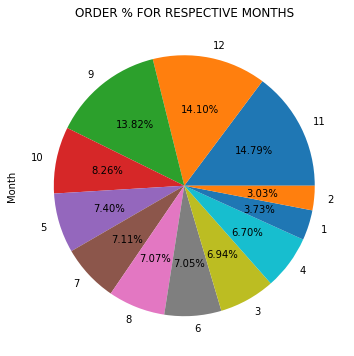

In [78]:
plt.figure(figsize=(14,6))
df['Month'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR RESPECTIVE MONTHS")
plt.show()

# CONCLUSION
The Month of __November__ receives the maximum percent of orders throughout the year i.e ___14.79 %__ \
Along side the month of __December__ also receive ___14.10 %___ of orders.

<hr style="border:1px solid gray">

In [79]:
#Sales on the base of years
top_sales = df.groupby(['Year']).sum().sort_values('Sales', ascending=False)
top_sales = top_sales[['Sales']].round(2)
top_sales.reset_index(inplace=True)
top_sales

,Year,Sales
0,2018,722052.02
1,2017,600192.55
2,2015,479856.21
3,2016,459436.01


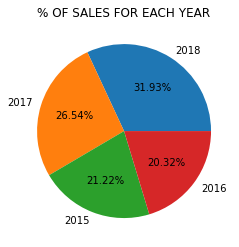

In [80]:
plt.pie(x=top_sales['Sales'],labels=top_sales['Year'],autopct='%1.2f%%')
plt.title("% OF SALES FOR EACH YEAR")
plt.show()

# CONCLUSION
So, the highest sales was in the year __2018__ which is around ___31.93 % ($ 722052.02)___

<hr style="border:2px solid gray">

# Year Wise Details:---

# 1. Year 2015

In [81]:
df_2015=df[df['Year']==2015]
pd.set_option('display.max_columns', None)

In [82]:
df_2015.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Day,Month,Year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days,4,1,2015


In [83]:
df_2015['Segment'].value_counts()

Consumer       1045
Corporate       601
Home Office     307
Name: Segment, dtype: int64

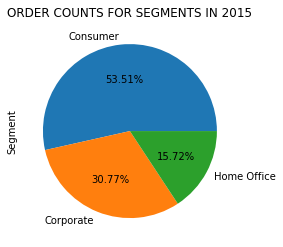

In [84]:
df_2015['Segment'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNTS FOR SEGMENTS IN 2015")
plt.show()

__Consumer__ segment have the maximum order counts of around ___53.51 % (1045 orders)___ 

In [85]:
#customer with most products orders
df_2015['Customer Name'].value_counts().head(10)

Sam Craven             16
Resi Pölking           14
Arthur Prichep         14
Shirley Daniels        12
Craig Molinari         11
Sanjit Chand           11
Ruben Dartt            11
Marina Lichtenstein    11
Kunst Miller           11
Xylona Preis           10
Name: Customer Name, dtype: int64

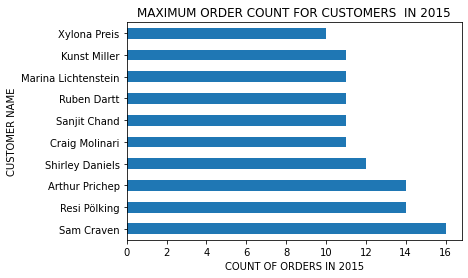

In [86]:
df_2015['Customer Name'].value_counts().head(10).plot.barh()
plt.title("MAXIMUM ORDER COUNT FOR CUSTOMERS  IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("CUSTOMER NAME")
plt.show()

# CONCLUSION
__Sam Craven__ is the customer with maximum no of product ordered i.e, ___16 times___

In [87]:
#customers with least product order
df_2015['Customer Name'].value_counts().tail(10)

Charles Sheldon      1
Troy Staebel         1
Craig Reiter         1
Jennifer Ferguson    1
Dorothy Wardle       1
Frank Merwin         1
Larry Tron           1
Patrick Ryan         1
Dennis Kane          1
Pamela Coakley       1
Name: Customer Name, dtype: int64

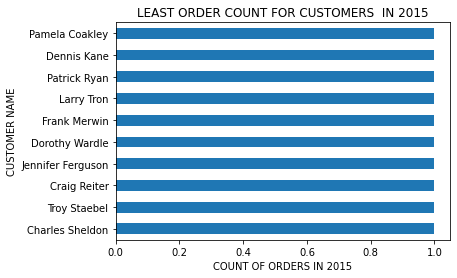

In [88]:
df_2015['Customer Name'].value_counts().tail(10).plot.barh()
plt.title("LEAST ORDER COUNT FOR CUSTOMERS  IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("CUSTOMER NAME")
plt.show()

# CONCLUSION
__Charles Sheldon__ is the customer with least no of product ordered i.e, ___1 time___

In [89]:
#cities with maximum orders
df_2015['City'].value_counts().head(10)

Los Angeles      153
New York City    141
San Francisco    128
Philadelphia     106
Houston           79
Seattle           78
Chicago           66
Columbus          50
San Diego         42
Springfield       28
Name: City, dtype: int64

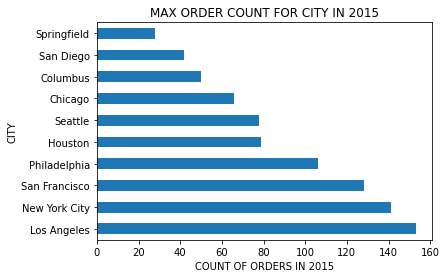

In [90]:
df_2015['City'].value_counts().head(10).plot.barh()
plt.title("MAX ORDER COUNT FOR CITY IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("CITY")
plt.show()

# CONCLUSION
___Los Angeles___ is the city from which maximum orders have been placed i.e ___153___

In [91]:
#cities with least orders
df_2015['City'].value_counts().tail(10)

Las Vegas        1
Odessa           1
Apple Valley     1
Oxnard           1
Green Bay        1
Greenville       1
Tyler            1
Bowling Green    1
Romeoville       1
Billings         1
Name: City, dtype: int64

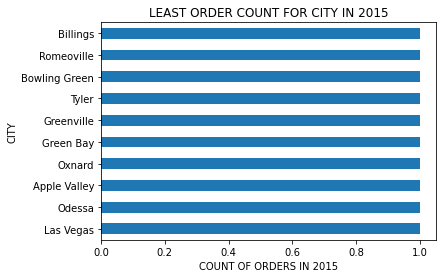

In [92]:
df_2015['City'].value_counts().tail(10).plot.barh()
plt.title("LEAST ORDER COUNT FOR CITY IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("CITY")
plt.show()

# CONCLUSION
___Billings___ is the city from which maximum orders have been placed i.e ___1 time___

In [93]:
#State with maximum orders
df_2015['State'].value_counts().head(10)

California      404
Texas           212
New York        190
Pennsylvania    113
Illinois        100
Washington       94
Ohio             88
Florida          85
Virginia         70
Arizona          48
Name: State, dtype: int64

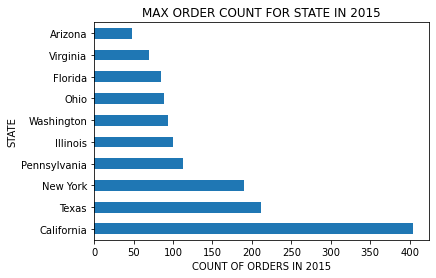

In [94]:
df_2015['State'].value_counts().head(10).plot.barh()
plt.title("MAX ORDER COUNT FOR STATE IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("STATE")
plt.show()

# CONCLUSION
__California__ is the state from which maximum orders have been placed ___404___

In [95]:
#State with least orders
df_2015['State'].value_counts().tail(10)

South Carolina    10
Nebraska           6
Kansas             6
New Mexico         5
Montana            5
New Hampshire      5
South Dakota       4
Idaho              4
Maine              3
Iowa               2
Name: State, dtype: int64

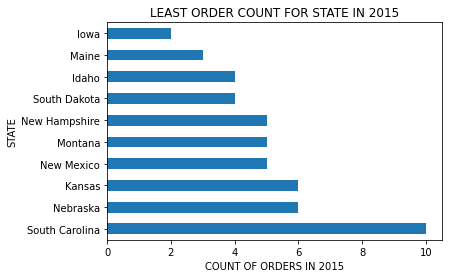

In [96]:
df_2015['State'].value_counts().tail(10).plot.barh()
plt.title("LEAST ORDER COUNT FOR STATE IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("STATE")
plt.show()

# CONCLUSION
__Iowa__ is the state from which least orders have been placed ___2___

In [97]:
#Region with maximum orders
df_2015['Region'].value_counts().head(10)

West       648
East       506
Central    455
South      344
Name: Region, dtype: int64

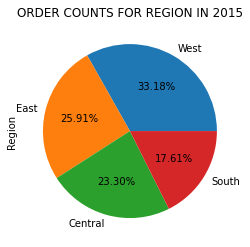

In [98]:
df_2015['Region'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNTS FOR REGION IN 2015")
plt.show()

# CONCLSUION
From the __West__ maximum orders have been receieved which is around ___33.18 % (648)___

In [99]:
#Maximum orders in category
df_2015['Category'].value_counts().head(10)

Office Supplies    1192
Furniture           414
Technology          347
Name: Category, dtype: int64

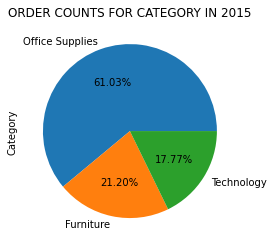

In [100]:
df_2015['Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNTS FOR CATEGORY IN 2015")
plt.show()

# CONCLUSION
__Office Supplies__ is the category from which maximum orders have been placed ie ___61.03 % (1192)___

In [101]:
#Maximum orders from sub catory
df_2015['Sub-Category'].value_counts().head(10)

Binders        283
Paper          265
Furnishings    179
Storage        175
Phones         170
Art            162
Accessories    141
Chairs         128
Appliances      92
Labels          75
Name: Sub-Category, dtype: int64

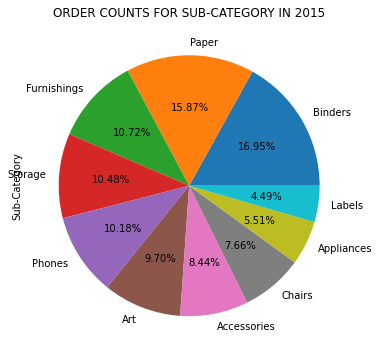

In [102]:
plt.figure(figsize=(14,6))
df_2015['Sub-Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNTS FOR SUB-CATEGORY IN 2015")
plt.show()

# CONCLUSION
Sub category __Blinders__ is the product received maximum orders around ___16.95 % (283)___

In [103]:
#Least orders from sub catory
df_2015['Sub-Category'].value_counts().tail(10)

Chairs        128
Appliances     92
Labels         75
Tables         70
Envelopes      53
Fasteners      49
Supplies       38
Bookcases      37
Machines       26
Copiers        10
Name: Sub-Category, dtype: int64

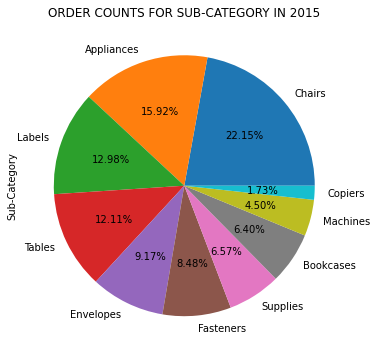

In [104]:
plt.figure(figsize=(14,6))
df_2015['Sub-Category'].value_counts().tail(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNTS FOR SUB-CATEGORY IN 2015")
plt.show()

# CONCLUSION
Sub category __Copiers__ is the product received least orders around ___1.73 % (10)___

In [105]:
#Maximum order for Products
df_2015['Product Name'].value_counts().head(10)

Staple envelope                                              14
Staples                                                      13
Easy-staple paper                                             7
KI Adjustable-Height Table                                    6
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     6
DMI Arturo Collection Mission-style Design Wood Chair         5
Space Solutions HD Industrial Steel Shelving.                 5
Avery Non-Stick Binders                                       5
Xerox 195                                                     5
Tennsco 6- and 18-Compartment Lockers                         5
Name: Product Name, dtype: int64

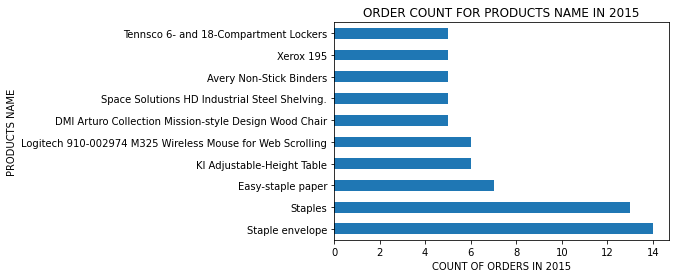

In [106]:
df_2015['Product Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR PRODUCTS NAME IN 2015")
plt.xlabel("COUNT OF ORDERS IN 2015")
plt.ylabel("PRODUCTS NAME")
plt.show()

# CONCLUSION
__Staple envelope__ is the product that have been ordered maximum times ie ___14 times___

In [107]:
#top customer from which highest sales are received
top_customer_2015 = df_2015.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_customer_2015 = top_customer_2015[['Sales']].round(2)
top_customer_2015.reset_index(inplace=True)
top_customer_2015

,Customer Name,Sales
0,Sean Miller,23661.23
1,Sanjit Chand,12876.48
2,Becky Martin,10539.90
3,Ken Lonsdale,8694.63
4,Tom Boeckenhauer,8137.26
5,Greg Tran,6391.78
6,Sean Braxton,6277.72
7,Nathan Mautz,5370.39
8,Nora Preis,5168.93
9,Mitch Webber,5030.44


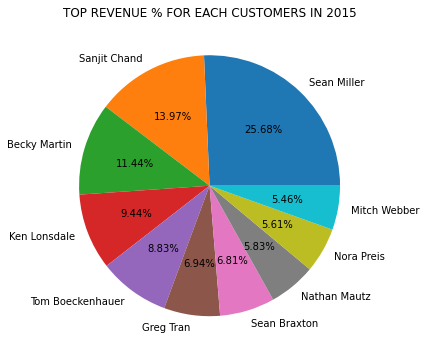

In [108]:
plt.figure(figsize=(14,6))
plt.pie(x=top_customer_2015['Sales'],labels=top_customer_2015['Customer Name'],autopct='%1.2f%%')
plt.title("TOP REVENUE % FOR EACH CUSTOMERS IN 2015")
plt.show()

# CONCLUSION
__Sean Miller__ is the customer from which highest sales have been receieved around ___($ 23661.23)___

In [109]:
#Segment from which maximum revenue have been earned
top_Segment_2015= df_2015.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
top_Segment_2015 = top_Segment_2015[['Sales']].round(2)
top_Segment_2015.reset_index(inplace=True)
top_Segment_2015

,Segment,Sales
0,Consumer,262956.80
1,Corporate,127797.50
2,Home Office,89101.91


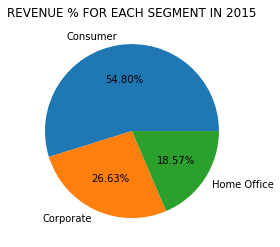

In [110]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Segment_2015['Sales'],labels=top_Segment_2015['Segment'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH SEGMENT IN 2015")
plt.show()

# CONCLUSION
__Consumer__ is the segment from which around 54.80 % ($ 262956.80) revenue has been generated

In [111]:
#Revenue from top city
top_City_2015= df_2015.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_City_2015 = top_City_2015[['Sales']].round(2)
top_City_2015.reset_index(inplace=True)
top_City_2015

,City,Sales
0,New York City,44361.09
1,San Francisco,30478.23
2,Los Angeles,28649.25
3,Jacksonville,25808.12
4,Seattle,23531.99
5,Philadelphia,18107.57
6,Houston,17695.46
7,San Antonio,14490.94
8,Minneapolis,10631.09
9,Chicago,10618.77


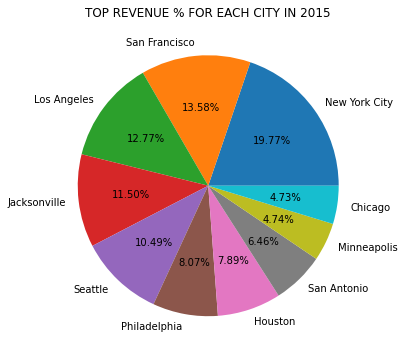

In [112]:
plt.figure(figsize=(16,6))
plt.pie(x=top_City_2015['Sales'],labels=top_City_2015['City'],autopct='%1.2f%%')
plt.title("TOP REVENUE % FOR EACH CITY IN 2015")
plt.show()

# CONCLUSION
__New York City__ is the city which have generated the highest revenue around ___19.77 % ($ 44361.09)___

In [113]:
#Revenue from top states
top_State_2015= df_2015.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_State_2015 = top_State_2015[['Sales']].round(2)
top_State_2015.reset_index(inplace=True)
top_State_2015

,State,Sales
0,California,89475.15
1,New York,64346.07
2,Texas,50139.49
3,Florida,34223.01
4,Washington,29871.58
5,Virginia,25802.05
6,Pennsylvania,20091.52
7,Minnesota,15883.33
8,Illinois,15776.69
9,Ohio,13704.26


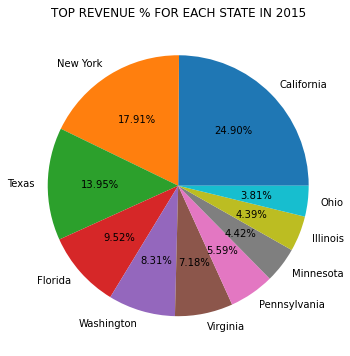

In [114]:
plt.figure(figsize=(16,6))
plt.pie(x=top_State_2015['Sales'],labels=top_State_2015['State'],autopct='%1.2f%%')
plt.title("TOP REVENUE % FOR EACH STATE IN 2015")
plt.show()

# CONCLUSION
__California__ is the State which provided the maximum revenue around ___24.90 % ($ 89475.15)___

In [115]:
#top revenues from region
top_Region_2015= df_2015.groupby(['Region']).sum().sort_values('Sales', ascending=False)
top_Region_2015 = top_Region_2015[['Sales']].round(2)
top_Region_2015.reset_index(inplace=True)
top_Region_2015

,Region,Sales
0,West,145907.96
1,East,127652.82
2,South,103374.91
3,Central,102920.52


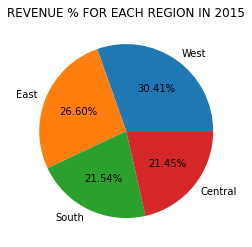

In [116]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Region_2015['Sales'],labels=top_Region_2015['Region'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH REGION IN 2015")
plt.show()

# CONCLUSION
__East region__ is the region with maximum revenue generated around ___30.41 % ($ 145907.96)___

In [117]:
#Revenue from category
top_Category_2015= df_2015.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_Category_2015 = top_Category_2015[['Sales']].round(2)
top_Category_2015.reset_index(inplace=True)
top_Category_2015

,Category,Sales
0,Technology,173865.51
1,Furniture,156477.88
2,Office Supplies,149512.82


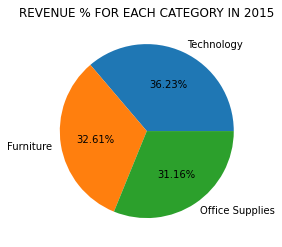

In [118]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Category_2015['Sales'],labels=top_Category_2015['Category'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH CATEGORY IN 2015")
plt.show()

# CONCLUSION
From __Technology__ highest revenue have been generated around ___36.23 % ($ 173865.51)___

In [119]:
#Revenue from sub-category
top_sub_Category_2015= df_2015.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)
top_sub_Category_2015 = top_sub_Category_2015[['Sales']].round(2)
top_sub_Category_2015.reset_index(inplace=True)
top_sub_Category_2015

,Sub-Category,Sales
0,Phones,77225.96
1,Chairs,77046.44
2,Machines,62023.37
3,Storage,49197.53
4,Tables,45757.78
5,Binders,43263.27
6,Accessories,23766.40
7,Bookcases,20036.68
8,Appliances,15160.72
9,Supplies,14335.62


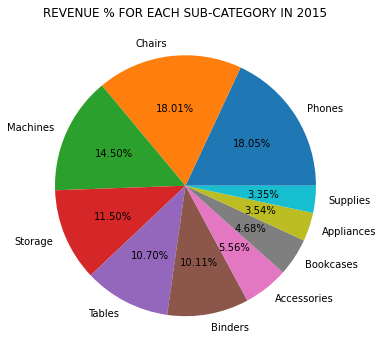

In [120]:
plt.figure(figsize=(16,6))
plt.pie(x=top_sub_Category_2015['Sales'],labels=top_sub_Category_2015['Sub-Category'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH SUB-CATEGORY IN 2015")
plt.show()

# CONCLUSION
From __Phones__ around ___18.05 %($ 77225.96)___ which is the highest

In [121]:
#Revenue from Product Name
top_Product_2015= df_2015.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)
top_Product_2015 = top_Product_2015[['Sales']].round(2)
top_Product_2015.reset_index(inplace=True)
top_Product_2015

,Product Name,Sales
0,Cisco TelePresence System EX90 Videoconferenci...,22638.48
1,Lexmark MX611dhe Monochrome Laser Printer,11219.93
2,HP Designjet T520 Inkjet Large Format Printer ...,9624.94
3,Ibico EPK-21 Electric Binding System,9449.95
4,High Speed Automatic Electric Letter Opener,8187.65
5,GBC DocuBind TL300 Electric Binding System,5740.74
6,Global Deluxe High-Back Manager's Chair,5633.81
7,Tennsco 6- and 18-Compartment Lockers,5568.57
8,GBC DocuBind P400 Electric Binding System,5443.96
9,Apple iPhone 5,5328.61


In [122]:
s2=top_Product_2015['Product Name'].str.split(' ').str[0:3].str.join(' ')

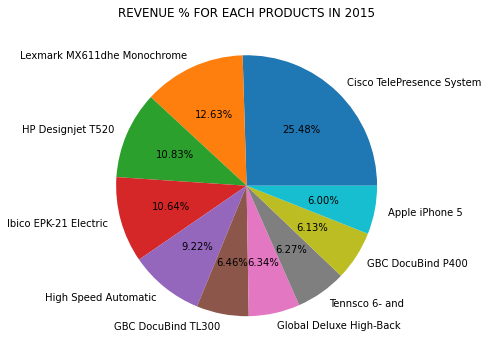

In [123]:
plt.figure(figsize=(16,6))
plt.pie(x=top_Product_2015['Sales'],labels=s2,autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH PRODUCTS IN 2015")
plt.show()

# CONCLUSION
__Cisco TelePresence System__ is the product with highest revenue earned ___25.48% ($ 22638.48)___

In [124]:
print(df_2015['Delivery Time'].mean())
print(df_2015['Order ID'].count())
print(df_2015['Sales'].sum())

3 days 23:54:06.082949308
1953
479856.2081


The __Average__ delivery days for year __2015__ is ___3 Days___ <br> The no of __Orders Count__ for year __2015__ is ___1953___ <br> The __Total Sales__ of year __2015__ is ___$ 479856.2081___

<hr style="border:1.5px solid gray">

# 2.  Year  2016

In [125]:
df_2016=df[df['Year']==2016]
pd.set_option('display.max_columns', None)

In [126]:
df_2016.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Day,Month,Year
2486,2487,CA-2016-104514,2016-01-02,2016-01-04,Second Class,CB-12535,Claudia Bergmann,Corporate,United States,Newark,Delaware,19711,East,OFF-ST-10001837,Office Supplies,Storage,"SAFCO Mobile Desk Side File, Wire Frame",85.52,2 days,2,1,2016
212,213,CA-2016-146262,2016-01-02,2016-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.68,7 days,2,1,2016


In [127]:
#orders from each segment
df_2016['Segment'].value_counts()

Consumer       1112
Corporate       608
Home Office     335
Name: Segment, dtype: int64

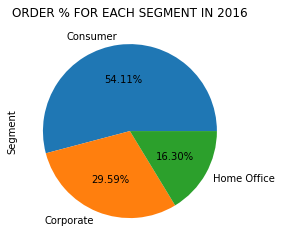

In [128]:
df_2016['Segment'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH SEGMENT IN 2016")
plt.show()

# CONCLUSION
From __Consumer__ segments maximum orders have been placed i.e ___54.11 % (1112 orders)___ 

In [129]:
#customer with most products orders
df_2016['Customer Name'].value_counts().head(10)

Peter Fuller     16
Sung Pak         15
Matt Abelman     14
Keith Dawkins    13
Anna Häberlin    13
Karl Braun       13
Michael Paige    12
Naresj Patel     12
David Bremer     12
Rob Dowd         11
Name: Customer Name, dtype: int64

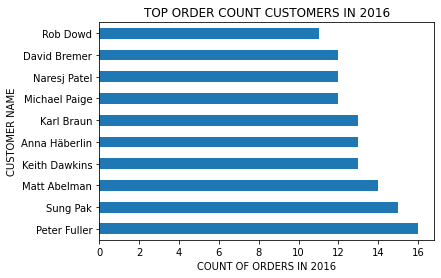

In [130]:
df_2016['Customer Name'].value_counts().head(10).plot.barh()
plt.title("TOP ORDER COUNT CUSTOMERS IN 2016")
plt.xlabel("COUNT OF ORDERS IN 2016")
plt.ylabel("CUSTOMER NAME")
plt.show()

# CONCLUSION
__Peter Fuller__ is the customer with maximum no of product ordered i.e, ___16 times___

In [131]:
#cities with maximum orders
df_2016['City'].value_counts().head(10)

New York City    199
Los Angeles      157
Philadelphia     118
Houston           92
San Francisco     73
Seattle           66
San Diego         58
Chicago           49
Detroit           37
Springfield       34
Name: City, dtype: int64

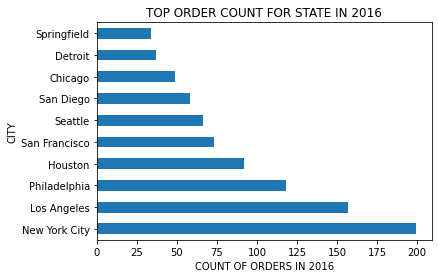

In [132]:
df_2016['City'].value_counts().head(10).plot.barh()
plt.title("TOP ORDER COUNT FOR STATE IN 2016")
plt.xlabel("COUNT OF ORDERS IN 2016")
plt.ylabel("CITY")
plt.show()

# CONCLUSION
__New York City__ is the city from which maximum orders have been placed i.e ___199___ 

In [133]:
#State with maximum orders
df_2016['State'].value_counts().head(10)

California      382
New York        247
Texas           201
Pennsylvania    136
Illinois         94
Ohio             81
Florida          78
Washington       73
Michigan         69
Arizona          63
Name: State, dtype: int64

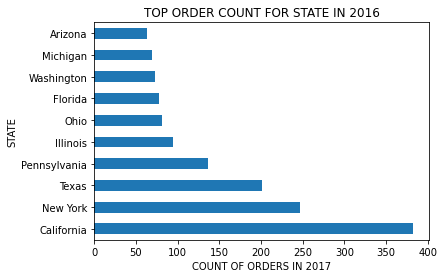

In [134]:
df_2016['State'].value_counts().head(10).plot.barh()
plt.title("TOP ORDER COUNT FOR STATE IN 2016")
plt.xlabel("COUNT OF ORDERS IN 2017")
plt.ylabel("STATE")
plt.show()

# CONCLUSION
__California__ is the state from which maximum orders have been placed ___382___

In [135]:
#Region with maximum orders
df_2016['Region'].value_counts().head(10)

East       626
West       625
Central    474
South      330
Name: Region, dtype: int64

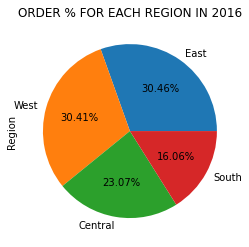

In [136]:
df_2016['Region'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH REGION IN 2016")
plt.show()

# CONCLSUION
From the __East__ maximum orders have been receieved which is around ___30.46 % (626)___

In [137]:
#Maximum orders in category
df_2016['Category'].value_counts().head(10)

Office Supplies    1210
Furniture           440
Technology          405
Name: Category, dtype: int64

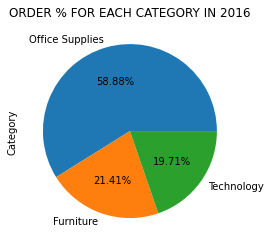

In [138]:
df_2016['Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH CATEGORY IN 2016")
plt.show()

# CONCLUSION
__Office Supplies__ is the category from which maximum orders have been placed ie ___58.88 % (1210)___

In [139]:
#Maximum orders from sub catory
df_2016['Sub-Category'].value_counts().head(10)

Binders        309
Paper          264
Phones         196
Furnishings    195
Storage        167
Accessories    165
Art            165
Chairs         131
Appliances      93
Labels          74
Name: Sub-Category, dtype: int64

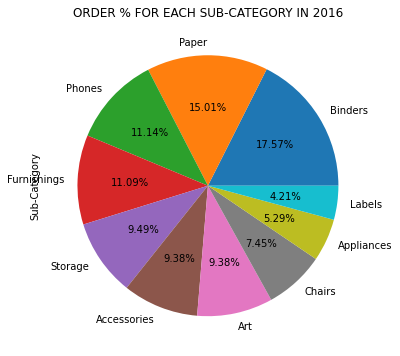

In [140]:
plt.figure(figsize=(14,6))
df_2016['Sub-Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH SUB-CATEGORY IN 2016")
plt.show()

# CONCLUSION
Sub category __Blinders__ is the product received maximum orders around ___(309)___

In [141]:
#Maximum order for Products
df_2016['Product Name'].value_counts().head(10)

Staple envelope                                                 11
Easy-staple paper                                               11
Staples                                                          9
Aluminum Screw Posts                                             6
Avery 474                                                        5
Samsung Rugby III                                                5
Boston Electric Pencil Sharpener, Model 1818, Charcoal Black     5
Plantronics MX500i Earset                                        5
Kingston Digital DataTraveler 16GB USB 2.0                       5
Enermax Acrylux Wireless Keyboard                                5
Name: Product Name, dtype: int64

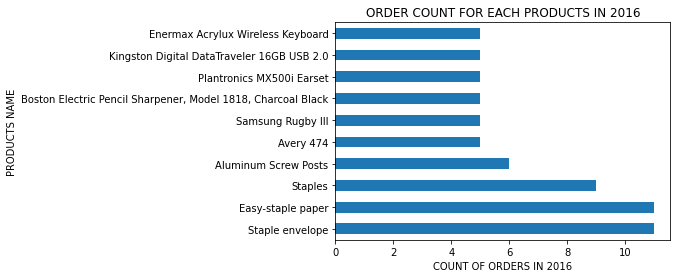

In [142]:
df_2016['Product Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR EACH PRODUCTS IN 2016")
plt.xlabel("COUNT OF ORDERS IN 2016")
plt.ylabel("PRODUCTS NAME")
plt.show()

# CONCLUSION
__Staple envelope__ is the product that have been ordered maximum times ie ___11 times___ 

In [143]:
#top customer from which highest sales are received
top_customer_2016 = df_2016.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_customer_2016 = top_customer_2016[['Sales']].round(2)
top_customer_2016.reset_index(inplace=True)
top_customer_2016

,Customer Name,Sales
0,Peter Fuller,9022.32
1,Keith Dawkins,7039.04
2,Christopher Martinez,6682.26
3,Fred Hopkins,6056.09
4,Natalie Webber,5511.32
5,Sarah Brown,5414.25
6,Joseph Holt,5352.79
7,Harry Marie,5327.80
8,Cassandra Brandow,4662.55
9,Quincy Jones,4409.85


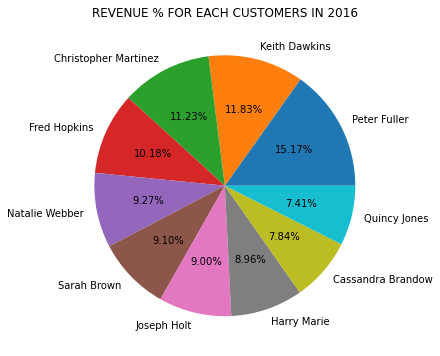

In [144]:
plt.figure(figsize=(14,6))
plt.pie(x=top_customer_2016['Sales'],labels=top_customer_2016['Customer Name'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH CUSTOMERS IN 2016")
plt.show()

# CONCLUSION
__Peter Fuller__ is the customer from which highest sales have been received in the year ___2016___

In [145]:
#Segment from which maximum revenue have been earned
top_Segment_2016= df_2016.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
top_Segment_2016 = top_Segment_2016[['Sales']].round(2)
top_Segment_2016.reset_index(inplace=True)
top_Segment_2016

,Segment,Sales
0,Consumer,265356.29
1,Corporate,119675.60
2,Home Office,74404.11


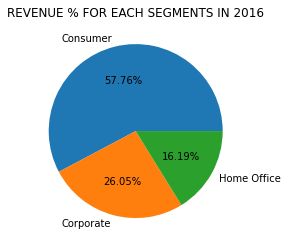

In [146]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Segment_2016['Sales'],labels=top_Segment_2016['Segment'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH SEGMENTS IN 2016")
plt.show()

# CONCLUSION
__Consumer__ is the segment from which around ___57.76 % ($ 265356.29)___ revenue has been generated

In [147]:
#Revenue from top city
top_City_2016= df_2016.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_City_2016 = top_City_2016[['Sales']].round(2)
top_City_2016.reset_index(inplace=True)
top_City_2016

,City,Sales
0,New York City,67506.13
1,Los Angeles,41324.64
2,Seattle,19424.79
3,Philadelphia,18904.01
4,San Francisco,14642.16
5,San Diego,14383.43
6,Houston,13698.76
7,Springfield,11723.64
8,Chicago,8391.77
9,Atlanta,7755.06


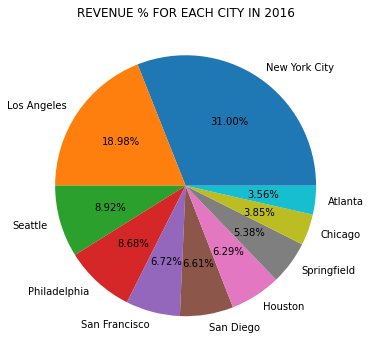

In [148]:
plt.figure(figsize=(16,6))
plt.pie(x=top_City_2016['Sales'],labels=top_City_2016['City'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH CITY IN 2016")
plt.show()

# CONCLUSION
__New York City__ is the city which have generated the highest revenue around ___($ 67506.13)___

In [149]:
#Revenue from top states
top_State_2016= df_2016.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_State_2016 = top_State_2016[['Sales']].round(2)
top_State_2016.reset_index(inplace=True)
top_State_2016

,State,Sales
0,California,85621.58
1,New York,77416.36
2,Texas,34005.91
3,Pennsylvania,20500.45
4,Washington,19981.09
5,Illinois,18578.06
6,Michigan,16843.68
7,Ohio,15918.25
8,Florida,14239.84
9,Georgia,11077.74


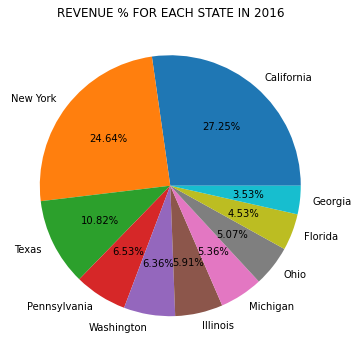

In [150]:
plt.figure(figsize=(16,6))
plt.pie(x=top_State_2016['Sales'],labels=top_State_2016['State'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH STATE IN 2016")
plt.show()

# CONCLUSION
__California__ is the State which provided the maximum revenue around ___($ 85621.58)___

In [151]:
#top revenues from region
top_Region_2016= df_2016.groupby(['Region']).sum().sort_values('Sales', ascending=False)
top_Region_2016 = top_Region_2016[['Sales']].round(2)
top_Region_2016.reset_index(inplace=True)
top_Region_2016

,Region,Sales
0,East,153225.18
1,West,133709.57
2,Central,102425.17
3,South,70076.08


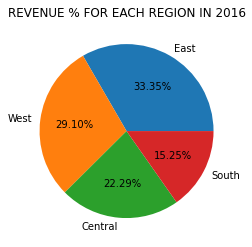

In [152]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Region_2016['Sales'],labels=top_Region_2016['Region'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH REGION IN 2016")
plt.show()

# CONCLUSION
__East__ region is the region with maximum revenue generated around ___33.35 % ($ 153225.18)___

In [153]:
#Revenue from category
top_Category_2016= df_2016.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_Category_2016 = top_Category_2016[['Sales']].round(2)
top_Category_2016.reset_index(inplace=True)
top_Category_2016

,Category,Sales
0,Furniture,164053.87
1,Technology,162257.73
2,Office Supplies,133124.41


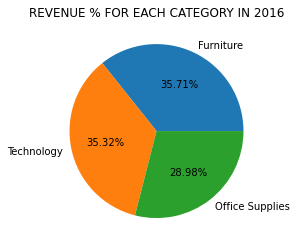

In [154]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Category_2016['Sales'],labels=top_Category_2016['Category'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH CATEGORY IN 2016")
plt.show()

# CONCLUSION
From __Furniture__ highest revenue have been generated around ___35.71 % ($ 164053.87)___

In [155]:
#Revenue from sub-category
top_sub_Category_2016= df_2016.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)
top_sub_Category_2016 = top_sub_Category_2016[['Sales']].round(2)
top_sub_Category_2016.reset_index(inplace=True)
top_sub_Category_2016

,Sub-Category,Sales
0,Chairs,70654.67
1,Phones,67870.61
2,Storage,43321.21
3,Accessories,40443.97
4,Bookcases,37476.77
5,Binders,36049.75
6,Tables,35397.20
7,Machines,27763.70
8,Copiers,26179.45
9,Appliances,23228.18


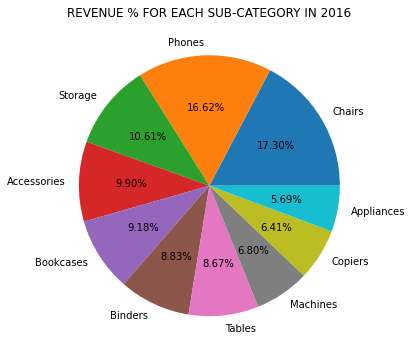

In [156]:
plt.figure(figsize=(16,6))
plt.pie(x=top_sub_Category_2016['Sales'],labels=top_sub_Category_2016['Sub-Category'],autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH SUB-CATEGORY IN 2016")
plt.show()

# CONCLUSION
From __Chairs__ around  ___($ 70654.67)___ which is the highest

In [157]:
#Revenue from Product Name
top_Product_2016= df_2016.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)
top_Product_2016 = top_Product_2016[['Sales']].round(2)
top_Product_2016.reset_index(inplace=True)
top_Product_2016

,Product Name,Sales
0,Fellowes PB500 Electric Punch Plastic Comb Bin...,15760.28
1,"Riverside Palais Royal Lawyers Bookcase, Royal...",11717.03
2,Zebra ZM400 Thermal Label Printer,6965.70
3,Canon PC1060 Personal Laser Copier,6019.91
4,Zebra GX420t Direct Thermal/Thermal Transfer P...,5521.88
5,GBC Ibimaster 500 Manual ProClick Binding System,5402.96
6,HON 5400 Series Task Chairs for Big and Tall,5257.35
7,Canon PC940 Copier,4589.90
8,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.64
9,Cisco 9971 IP Video Phone Charcoal,4268.00


In [158]:
s1=top_Product_2016['Product Name'].str.split(' ').str[0:3].str.join(' ')

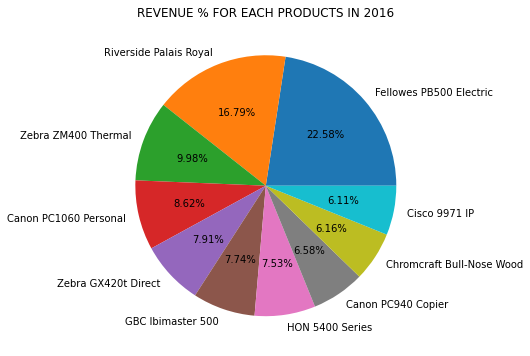

In [159]:
plt.figure(figsize=(16,6))
plt.pie(x=top_Product_2016['Sales'],labels=s1,autopct='%1.2f%%')
plt.title("REVENUE % FOR EACH PRODUCTS IN 2016")
plt.show()

# CONCLUSION
__Fellowes PB500 Electric__ is the product with highest revenue earned ___($ 15760.28)___ 

In [160]:
print(df_2016['Delivery Time'].mean())
print(df_2016['Order ID'].count())
print(df_2016['Sales'].sum())

4 days 00:51:51.240875912
2055
459436.0054


The __Average__ delivery days for year __2016__ is ___4 Days___ <br> The no of __Orders Count__ for year __2016__ is ___2055___ <br> The __Total Sales__ of year __2016__ is ___$ 459436.0054___

<hr style="border:1.5px solid gray">

# 3. Year 2017

In [161]:
df_2017=df[df['Year']==2017]
pd.set_option('display.max_columns', None)

In [162]:
df_2017.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Day,Month,Year
4918,4919,CA-2017-160304,2017-01-02,2017-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,20877,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,5 days,2,1,2017
4919,4920,CA-2017-160304,2017-01-02,2017-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,20877,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,5 days,2,1,2017


In [163]:
#segment with most products orders
df_2017['Segment'].value_counts().head(10)

Consumer       1304
Corporate       775
Home Office     455
Name: Segment, dtype: int64

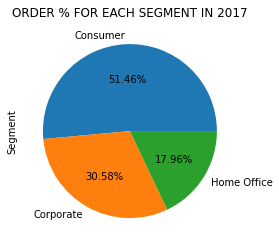

In [236]:
df_2017['Segment'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH SEGMENT IN 2017")
plt.show()

# CONCLUSION
__Consumer__ is the segment with maximum order counts ___51.46 % (1304)___

In [164]:
#customer with most products orders
df_2017['Customer Name'].value_counts().head(10)

Jonathan Doherty      21
Paul Prost            20
Pete Kriz             17
Edward Hooks          17
Stewart Carmichael    15
Laura Armstrong       15
Clay Ludtke           15
William Brown         14
Ted Butterfield       13
Ken Lonsdale          13
Name: Customer Name, dtype: int64

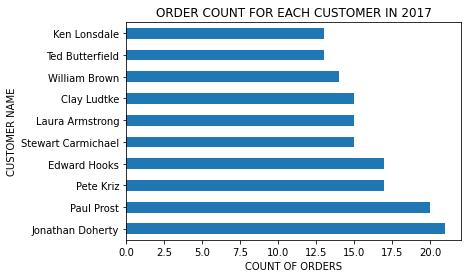

In [165]:
df_2017['Customer Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR EACH CUSTOMER IN 2017")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("CUSTOMER NAME")
plt.show()

# CONCLUSION
__Jonathan Doherty__ is the customer with maximum no of product ordered i.e, ___21 times___

In [166]:
#cities with maximum orders
df_2017['City'].value_counts().head(10)

New York City    248
Los Angeles      211
Philadelphia     126
San Francisco    112
Seattle          100
Houston           99
Chicago           83
Columbus          56
Springfield       55
Dallas            40
Name: City, dtype: int64

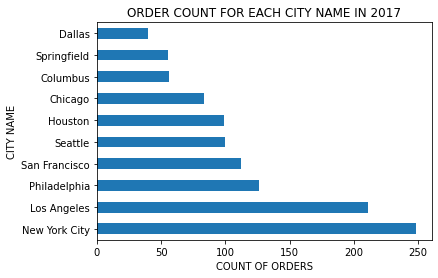

In [167]:
df_2017['City'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR EACH CITY NAME IN 2017")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("CITY NAME")
plt.show()

# CONCLUSION
__New York City__ is the city from which maximum orders have been placed i.e ___248___ 

In [168]:
#State with maximum orders
df_2017['State'].value_counts().head(10)

California        508
New York          311
Texas             243
Pennsylvania      136
Ohio              129
Washington        122
Illinois          121
Florida            84
North Carolina     74
Michigan           69
Name: State, dtype: int64

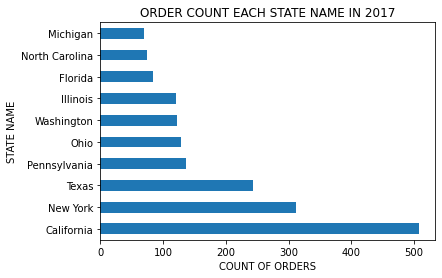

In [169]:
df_2017['State'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT EACH STATE NAME IN 2017")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("STATE NAME")
plt.show()

# CONCLUSION
__California__ is the state from which maximum orders have been placed ___508___

In [170]:
#Region with maximum orders
df_2017['Region'].value_counts().head(10)

West       787
East       745
Central    591
South      411
Name: Region, dtype: int64

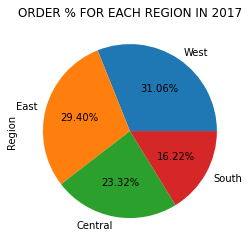

In [171]:
df_2017['Region'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH REGION IN 2017")
plt.show()

# CONCLSUION
From the __West__ maximum orders have been receieved which is around ___31.06 % (787)___

In [172]:
#Maximum orders in category
df_2017['Category'].value_counts().head(10)

Office Supplies    1537
Furniture           547
Technology          450
Name: Category, dtype: int64

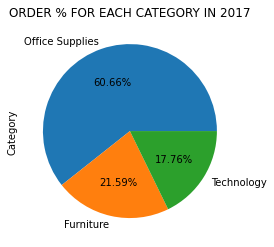

In [173]:
df_2017['Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH CATEGORY IN 2017")
plt.show()

# CONCLUSION
__Office Supplies__ is the category from which maximum orders have been placed ie ___60.66 % (1537)___

In [174]:
#Maximum orders from sub catory
df_2017['Sub-Category'].value_counts().head(10)

Binders        408
Paper          357
Furnishings    247
Phones         220
Storage        209
Accessories    184
Art            179
Chairs         161
Appliances     113
Labels          95
Name: Sub-Category, dtype: int64

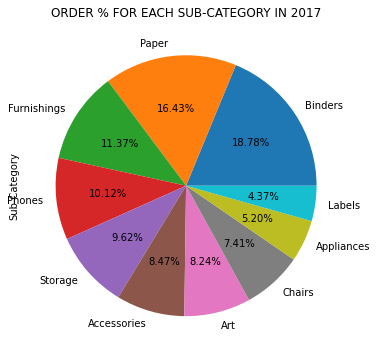

In [175]:
plt.figure(figsize=(14,6))
df_2017['Sub-Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER % FOR EACH SUB-CATEGORY IN 2017")
plt.show()

# CONCLUSION
Sub category __Blinders__ is the product received maximum orders around ___(408)___

In [176]:
#Maximum order for Products
df_2017['Product Name'].value_counts().head(10)

Staple envelope                                                11
Easy-staple paper                                              10
Chromcraft Round Conference Tables                              9
Staples                                                         9
XtraLife ClearVue Slant-D Ring Binder, White, 3"                7
Ibico EB-19 Dual Function Manual Binding System                 6
Premium Transparent Presentation Covers by GBC                  6
Acco Perma 4000 Stacking Storage Drawers                        6
Avery Non-Stick Binders                                         6
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back     6
Name: Product Name, dtype: int64

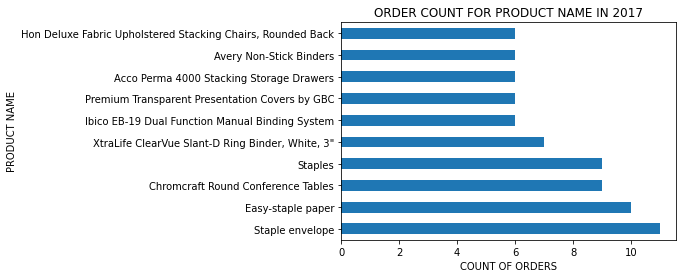

In [177]:
df_2017['Product Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR PRODUCT NAME IN 2017")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("PRODUCT NAME")
plt.show()

# CONCLUSION
__Staple envelope__ is the product that have been ordered maximum times ie ___11 times___ 

In [178]:
#top customer from which highest sales are received
top_customer_2017 = df_2017.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_customer_2017 = top_customer_2017[['Sales']].round(2)
top_customer_2017.reset_index(inplace=True)
top_customer_2017

,Customer Name,Sales
0,Tamara Chand,18344.05
1,Christopher Conant,11901.18
2,Adrian Barton,10403.86
3,Sanjit Engle,9879.22
4,Bill Shonely,9199.78
5,Edward Hooks,7606.69
6,Joe Elijah,7587.97
7,Laura Armstrong,6451.22
8,Karen Daniels,6317.16
9,Jonathan Doherty,6181.11


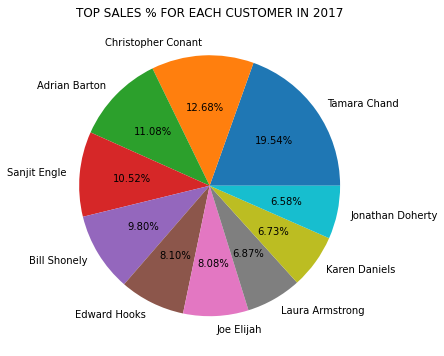

In [179]:
plt.figure(figsize=(14,6))
plt.pie(x=top_customer_2017['Sales'],labels=top_customer_2017['Customer Name'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH CUSTOMER IN 2017")
plt.show()

# CONCLUSION
__Tamara Chand__ is the customer from which highest sales around ___($ 18344.05)___

In [180]:
#Segment from which maximum revenue have been earned
top_Segment_2017= df_2017.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
top_Segment_2017 = top_Segment_2017[['Sales']].round(2)
top_Segment_2017.reset_index(inplace=True)
top_Segment_2017

,Segment,Sales
0,Consumer,291142.97
1,Corporate,204977.32
2,Home Office,104072.27


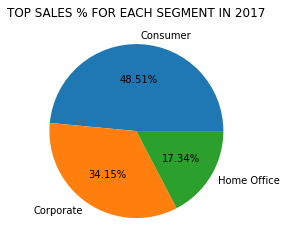

In [181]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Segment_2017['Sales'],labels=top_Segment_2017['Segment'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH SEGMENT IN 2017")
plt.show()

# CONCLUSION
__Consumer__ is the segment from which around ___48.51 % ($ 291142.97)___ revenue has been generated

In [182]:
#Revenue from top city
top_City_2017= df_2017.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_City_2017 = top_City_2017[['Sales']].round(2)
top_City_2017.reset_index(inplace=True)
top_City_2017

,City,Sales
0,Los Angeles,55273.12
1,New York City,53806.55
2,Philadelphia,30234.67
3,San Francisco,27021.64
4,Detroit,21197.32
5,Lafayette,18431.34
6,San Diego,18321.00
7,Houston,16349.11
8,Seattle,16158.72
9,Springfield,13114.93


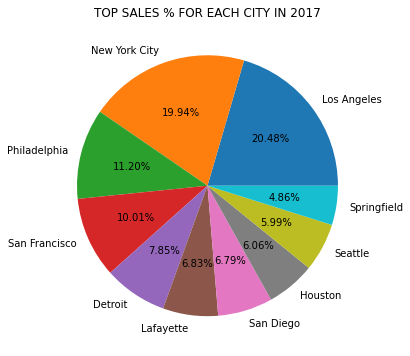

In [183]:
plt.figure(figsize=(16,6))
plt.pie(x=top_City_2017['Sales'],labels=top_City_2017['City'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH CITY IN 2017")
plt.show()

# CONCLUSION
__Los Angeles__ is the city which have generated the highest revenue around ___($ 55273.12)___

In [184]:
#Revenue from top states
top_State_2017= df_2017.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_State_2017 = top_State_2017[['Sales']].round(2)
top_State_2017.reset_index(inplace=True)
top_State_2017

,State,Sales
0,California,126542.96
1,New York,70826.56
2,Texas,41005.38
3,Pennsylvania,32996.37
4,Michigan,27286.50
5,Virginia,26691.05
6,Indiana,25461.78
7,Ohio,24135.08
8,Illinois,21033.72
9,Washington,19814.28


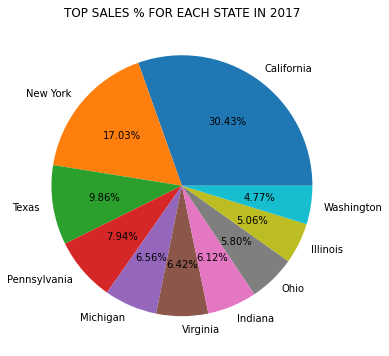

In [185]:
plt.figure(figsize=(16,6))
plt.pie(x=top_State_2017['Sales'],labels=top_State_2017['State'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH STATE IN 2017")
plt.show()

# CONCLUSION
__California__ is the State which provided the maximum revenue around ___($ 126542.96)___

In [186]:
#top revenues from region
top_Region_2017= df_2017.groupby(['Region']).sum().sort_values('Sales', ascending=False)
top_Region_2017 = top_Region_2017[['Sales']].round(2)
top_Region_2017.reset_index(inplace=True)
top_Region_2017

,Region,Sales
0,West,182471.23
1,East,178511.54
2,Central,145673.88
3,South,93535.90


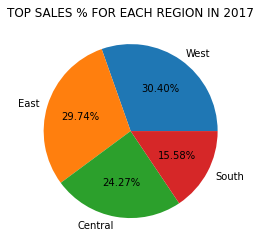

In [187]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Region_2017['Sales'],labels=top_Region_2017['Region'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH REGION IN 2017")
plt.show()

# CONCLUSION
__West__ region is the region with maximum revenue generated around ___30.40 % ($ 182471.23)___

In [188]:
#Revenue from category
top_Category_2017= df_2017.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_Category_2017 = top_Category_2017[['Sales']].round(2)
top_Category_2017.reset_index(inplace=True)
top_Category_2017

,Category,Sales
0,Technology,221961.94
1,Furniture,195813.04
2,Office Supplies,182417.57


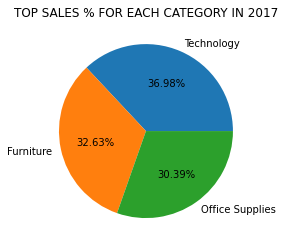

In [189]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Category_2017['Sales'],labels=top_Category_2017['Category'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH CATEGORY IN 2017")
plt.show()

# CONCLUSION
From __Furniture__ highest revenue have been generated around ___36.98 % ($ 221961.94)___

In [190]:
#Revenue from sub-category
top_sub_Category_2017= df_2017.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).tail(10)
top_sub_Category_2017 = top_sub_Category_2017[['Sales']].round(2)
top_sub_Category_2017.reset_index(inplace=True)
top_sub_Category_2017

,Sub-Category,Sales
0,Accessories,41735.36
1,Furnishings,26845.12
2,Bookcases,26275.47
3,Appliances,26016.79
4,Paper,20326.04
5,Supplies,14242.06
6,Art,5890.61
7,Envelopes,4456.66
8,Labels,2792.66
9,Fasteners,946.27


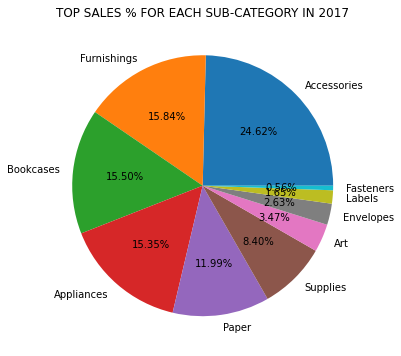

In [191]:
plt.figure(figsize=(16,6))
plt.pie(x=top_sub_Category_2017['Sales'],labels=top_sub_Category_2017['Sub-Category'],autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH SUB-CATEGORY IN 2017")
plt.show()

# CONCLUSION
From __Chairs__ around  ___($ 81930.34)___ which is the highest

In [192]:
#Revenue from Product Name
top_Product_2017= df_2017.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)
top_Product_2017 = top_Product_2017[['Sales']].round(2)
top_Product_2017.reset_index(inplace=True)
top_Product_2017

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,25899.93
1,GBC Ibimaster 500 Manual ProClick Binding System,12860.56
2,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93
3,High Speed Automatic Electric Letter Opener,8842.66
4,HP Designjet T520 Inkjet Large Format Printer ...,8749.95
5,Okidata MB760 Printer,7834.40
6,Hewlett Packard LaserJet 3310 Copier,6839.89
7,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",6367.88
8,Global Troy Executive Leather Low-Back Tilter,5510.78
9,GBC DocuBind P400 Electric Binding System,5443.96


In [193]:
s4=top_Product_2017['Product Name'].str.split(' ').str[0:3].str.join(' ')

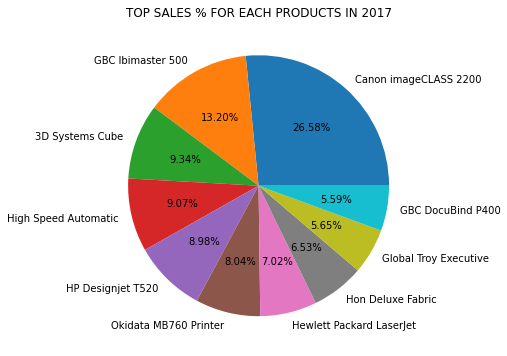

In [194]:
plt.figure(figsize=(16,6))
plt.pie(x=top_Product_2017['Sales'],labels=s4,autopct='%1.2f%%')
plt.title("TOP SALES % FOR EACH PRODUCTS IN 2017")
plt.show()

# CONCLUSION
__Canon imageCLASS 2200__ is the product with highest revenue earned ___26.58% ($ 25899.93)___ 

In [195]:
print(df_2017['Delivery Time'].mean())
print(df_2017['Order ID'].count())
print(df_2017['Sales'].sum())

3 days 22:41:34.711917916
2534
600192.55


The __Average__ delivery days for year __2017__ is ___3 Days___ <br> The no of __Orders Count__ for year __2017__ is ___2534___ <br> The __Total Sales__ of year __2017__ is ___$ 600192.55___

<hr style="border:1.5px solid gray">

# 4. Year 2018

In [196]:
df_2018=df[df['Year']==2018]
pd.set_option('display.max_columns', None)

In [197]:
df_2018.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Day,Month,Year
8072,8073,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4 days,1,1,2018
8071,8072,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4 days,1,1,2018


In [237]:
#Segment with most products orders
df_2018['Segment'].value_counts().head(10)

Consumer       1640
Corporate       969
Home Office     649
Name: Segment, dtype: int64

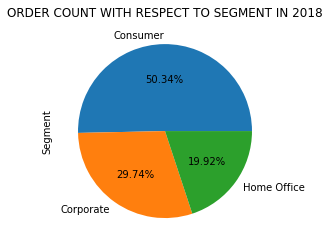

In [238]:
df_2018['Segment'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNT WITH RESPECT TO SEGMENT IN 2018")
plt.show()

# CONCLUSION
__Consumer__ is the segment with highest order count ___50.34% (1640)___

In [198]:
#customer with most products orders
df_2018['Customer Name'].value_counts().head(10)

Seth Vernon         20
Dean percer         19
John Lee            19
Mick Hernandez      19
Lena Cacioppo       17
Ann Chong           16
Saphhira Shifley    16
Janet Martin        15
Emily Phan          15
Darrin Sayre        15
Name: Customer Name, dtype: int64

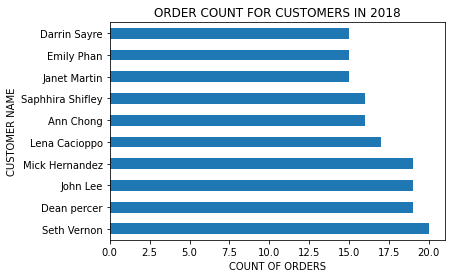

In [199]:
df_2018['Customer Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR CUSTOMERS IN 2018")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("CUSTOMER NAME")
plt.show()

# CONCLUSION
__Seth Vernon__ is the customer with maximum no of product ordered i.e, ___20 times___

In [200]:
#cities with maximum orders
df_2018['City'].value_counts().head(10)

New York City    303
Los Angeles      207
San Francisco    187
Philadelphia     182
Seattle          182
Chicago          110
Houston          104
Columbus          82
Dallas            70
Jacksonville      45
Name: City, dtype: int64

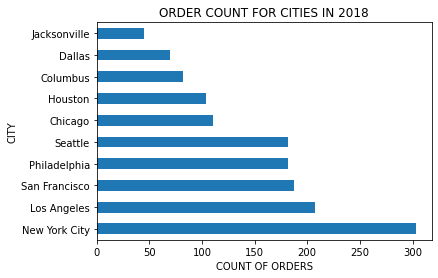

In [201]:
df_2018['City'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR CITIES IN 2018")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("CITY")
plt.show()

# CONCLUSION
__New York City__ is the city from which maximum orders have been placed i.e ___303___ 

In [202]:
#State with maximum orders
df_2018['State'].value_counts().head(10)

California        652
New York          349
Texas             317
Washington        215
Pennsylvania      197
Illinois          168
Ohio              156
Florida           126
North Carolina     83
Tennessee          81
Name: State, dtype: int64

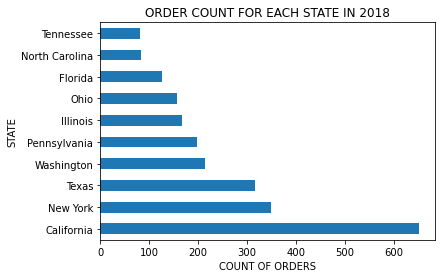

In [203]:
df_2018['State'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR EACH STATE IN 2018")
plt.xlabel("COUNT OF ORDERS")
plt.ylabel("STATE")
plt.show()

# CONCLUSION
__California__ is the state from which maximum orders have been placed ___652___

In [204]:
#Region with maximum orders
df_2018['Region'].value_counts().head(10)

West       1080
East        908
Central     757
South       513
Name: Region, dtype: int64

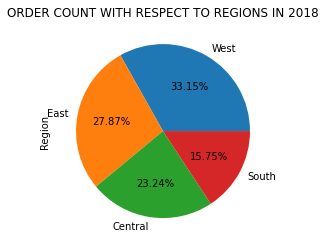

In [205]:
df_2018['Region'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNT WITH RESPECT TO REGIONS IN 2018")
plt.show()

# CONCLSUION
From the __West__ maximum orders have been receieved which is around ___33.15 % (1080)___

In [206]:
#Maximum orders in category
df_2018['Category'].value_counts().head(10)

Office Supplies    1970
Furniture           677
Technology          611
Name: Category, dtype: int64

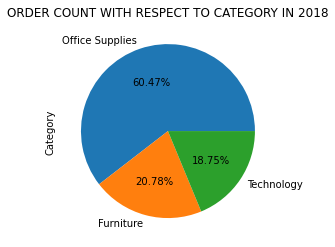

In [207]:
df_2018['Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("ORDER COUNT WITH RESPECT TO CATEGORY IN 2018")
plt.show()

# CONCLUSION
__Office Supplies__ is the category from which maximum orders have been placed ie ___60.47 % (1970)___

In [208]:
#Maximum orders from sub catory
df_2018['Sub-Category'].value_counts().head(10)

Binders        492
Paper          452
Furnishings    310
Phones         290
Storage        281
Art            279
Accessories    266
Chairs         187
Appliances     161
Labels         113
Name: Sub-Category, dtype: int64

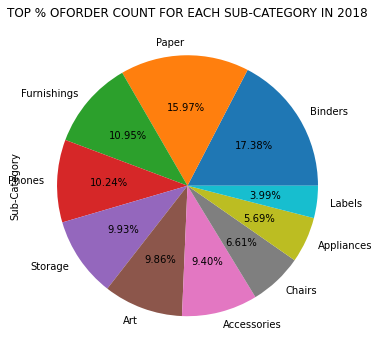

In [209]:
plt.figure(figsize=(14,6))
df_2018['Sub-Category'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.title("TOP % OFORDER COUNT FOR EACH SUB-CATEGORY IN 2018")
plt.show()

# CONCLUSION
Sub category __Blinders__ is the product received maximum orders around ___(492)___

In [210]:
#Maximum order for Products
df_2018['Product Name'].value_counts().head(10)

Easy-staple paper                                  16
Staples                                            15
Staple envelope                                    11
Staples in misc. colors                            11
Staple remover                                      8
Storex Dura Pro Binders                             8
Global Wood Trimmed Manager's Task Chair, Khaki     8
Logitech Desktop MK120 Mouse and keyboard Combo     7
Sterilite Officeware Hinged File Box                7
Strathmore Photo Mount Cards                        7
Name: Product Name, dtype: int64

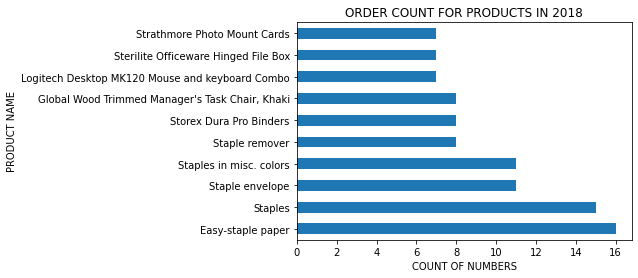

In [211]:
df_2018['Product Name'].value_counts().head(10).plot.barh()
plt.title("ORDER COUNT FOR PRODUCTS IN 2018")
plt.xlabel("COUNT OF NUMBERS")
plt.ylabel("PRODUCT NAME")
plt.show()

# CONCLUSION
__Easy-staple paper__ is the product that have been ordered maximum times ie ___16 times___ 

In [212]:
#top customer from which highest sales are received
top_customer_2018 = df_2018.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_customer_2018 = top_customer_2018[['Sales']].round(2)
top_customer_2018.reset_index(inplace=True)
top_customer_2018

,Customer Name,Sales
0,Raymond Buch,14203.28
1,Tom Ashbrook,13723.50
2,Hunter Lopez,10522.55
3,Seth Vernon,8459.94
4,Grant Thornton,8167.42
5,Todd Sumrall,6702.29
6,Rick Wilson,6193.45
7,Pete Kriz,5979.14
8,Karen Ferguson,5825.46
9,Andy Reiter,5820.58


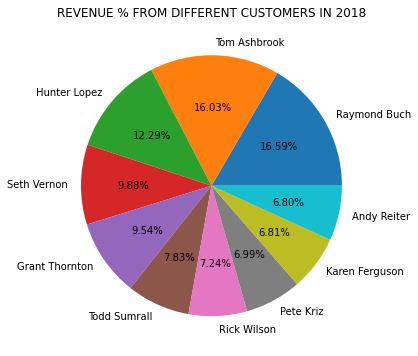

In [213]:
plt.figure(figsize=(14,6))
plt.pie(x=top_customer_2018['Sales'],labels=top_customer_2018['Customer Name'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT CUSTOMERS IN 2018")
plt.show()

# CONCLUSION
__Raymond Buch__ is the customer from which highest sales of around  ___( $ 14203.28)___

In [214]:
#Segment from which maximum revenue have been earned
top_Segment_2018= df_2018.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
top_Segment_2018 = top_Segment_2018[['Sales']].round(2)
top_Segment_2018.reset_index(inplace=True)
top_Segment_2018

,Segment,Sales
0,Consumer,328604.47
1,Corporate,236043.66
2,Home Office,157403.88


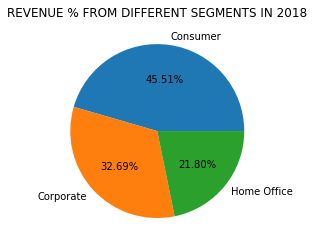

In [215]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Segment_2018['Sales'],labels=top_Segment_2018['Segment'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT SEGMENTS IN 2018")
plt.show()

# CONCLUSION
__Consumer__ is the segment from which around ___45.51 % ($ 328604.47)___ revenue has been generated

In [216]:
#Revenue from top city
top_City_2018= df_2018.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_City_2018 = top_City_2018[['Sales']].round(2)
top_City_2018.reset_index(inplace=True)
top_City_2018

,City,Sales
0,New York City,86788.77
1,Seattle,56990.82
2,Los Angeles,48173.17
3,Philadelphia,41595.50
4,San Francisco,36899.09
5,Columbus,17571.47
6,Houston,16212.81
7,Chicago,15742.04
8,Newark,13808.47
9,Jackson,13592.27


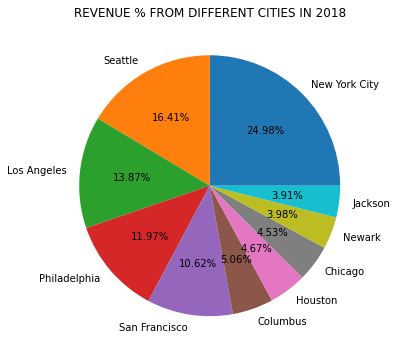

In [217]:
plt.figure(figsize=(16,6))
plt.pie(x=top_City_2018['Sales'],labels=top_City_2018['City'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT CITIES IN 2018")
plt.show()

# CONCLUSION
__New York City__ is the city which have generated the highest revenue around ___($ 86788.77)___

In [218]:
#Revenue from top states
top_State_2018= df_2018.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_State_2018 = top_State_2018[['Sales']].round(2)
top_State_2018.reset_index(inplace=True)
top_State_2018

,State,Sales
0,California,144666.77
1,New York,93772.17
2,Washington,65539.90
3,Texas,43421.76
4,Pennsylvania,42688.31
5,Florida,26444.72
6,Michigan,25833.65
7,Illinois,23848.04
8,North Carolina,23019.63
9,Ohio,21372.76


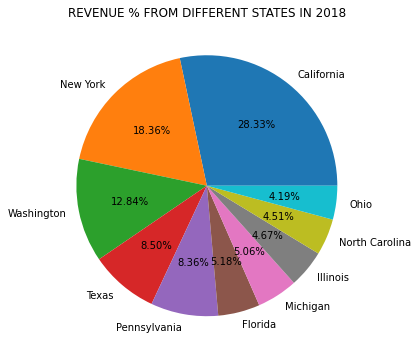

In [219]:
plt.figure(figsize=(16,6))
plt.pie(x=top_State_2018['Sales'],labels=top_State_2018['State'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT STATES IN 2018")
plt.show()

# CONCLUSION
__California__ is the State which provided the maximum revenue around ___($ 144666.77)___

In [220]:
#top revenues from region
top_Region_2018= df_2018.groupby(['Region']).sum().sort_values('Sales', ascending=False)
top_Region_2018 = top_Region_2018[['Sales']].round(2)
top_Region_2018.reset_index(inplace=True)
top_Region_2018

,Region,Sales
0,West,248130.93
1,East,210129.19
2,Central,141627.34
3,South,122164.57


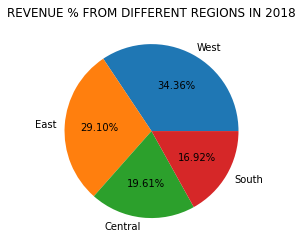

In [221]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Region_2018['Sales'],labels=top_Region_2018['Region'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT REGIONS IN 2018")
plt.show()

# CONCLUSION
__West__ region is the region with maximum revenue generated around ___34.36 % ($ 248130.93)___

In [222]:
#Revenue from category
top_Category_2018= df_2018.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_Category_2018 = top_Category_2018[['Sales']].round(2)
top_Category_2018.reset_index(inplace=True)
top_Category_2018

,Category,Sales
0,Technology,269370.69
1,Office Supplies,240367.54
2,Furniture,212313.79


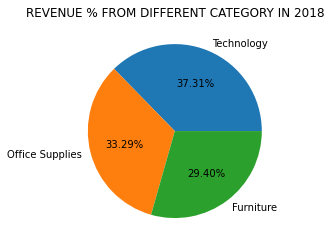

In [223]:
plt.figure(figsize=(10,4))
plt.pie(x=top_Category_2018['Sales'],labels=top_Category_2018['Category'],autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT CATEGORY IN 2018")
plt.show()

# CONCLUSION
From __Technology__ highest revenue have been generated around ___37.31 % ($ 269370.69)___

In [224]:
#Revenue from sub-category
top_sub_Category_2018= df_2018.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)
top_sub_Category_2018 = top_sub_Category_2018[['Sales']].round(2)
top_sub_Category_2018.reset_index(inplace=True)
top_sub_Category_2018

,Sub-Category,Sales
0,Phones,104685.66
1,Chairs,93191.27
2,Binders,71721.26
3,Storage,68072.70
4,Copiers,62899.39
5,Tables,60893.54
6,Accessories,58240.97
7,Machines,43544.68
8,Appliances,40212.72
9,Bookcases,30024.28


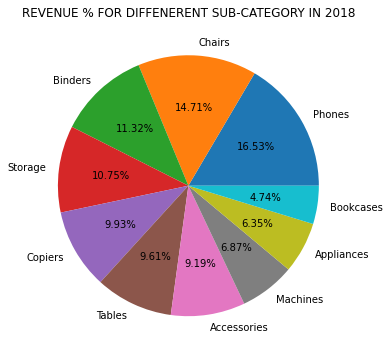

In [225]:
plt.figure(figsize=(16,6))
plt.pie(x=top_sub_Category_2018['Sales'],labels=top_sub_Category_2018['Sub-Category'],autopct='%1.2f%%')
plt.title("REVENUE % FOR DIFFENERENT SUB-CATEGORY IN 2018")
plt.show()

# CONCLUSION
From __Phones__ around  ___($ 104685.66)___ which is the highest

In [226]:
#Revenue from Product Name
top_Product_2018= df_2018.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)
top_Product_2018 = top_Product_2018[['Sales']].round(2)
top_Product_2018.reset_index(inplace=True)
top_Product_2018

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,35699.90
1,Martin Yale Chadless Opener Electric Letter Op...,11825.90
2,GBC DocuBind TL300 Electric Binding System,10943.28
3,Hewlett Packard LaserJet 3310 Copier,9239.85
4,Samsung Galaxy Mega 6.3,9239.78
5,Cubify CubeX 3D Printer Triple Head Print,7999.98
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,7371.74
7,HON 5400 Series Task Chairs for Big and Tall,7220.09
8,GBC DocuBind P400 Electric Binding System,7077.15
9,Lexmark MX611dhe Monochrome Laser Printer,5609.97


In [227]:
s5=top_Product_2018['Product Name'].str.split(' ').str[0:3].str.join(' ')

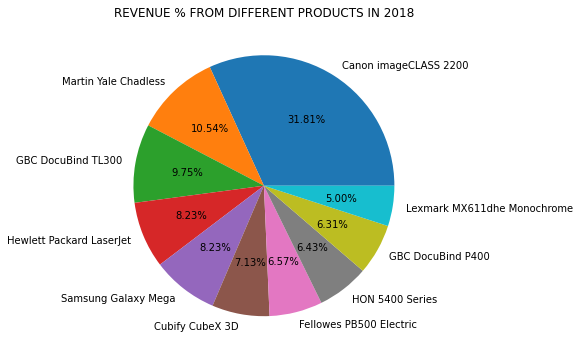

In [228]:
plt.figure(figsize=(16,6))
plt.pie(x=top_Product_2018['Sales'],labels=s5,autopct='%1.2f%%')
plt.title("REVENUE % FROM DIFFERENT PRODUCTS IN 2018")
plt.show()

# CONCLUSION
__Canon imageCLASS 2200__ is the product with highest revenue earned ___($ 35699.90)___ 

In [229]:
print(df_2018['Delivery Time'].mean())
print(df_2018['Order ID'].count())
print(df_2018['Sales'].sum())

3 days 21:43:25.524861878
3258
722052.0192


The __Average__ delivery days for year __2018__ is ___3 Days___ <br> The no of __Orders Count__ for year __2018__ is ___3258___ <br> The __Total Sales__ of year __2018__ is ___$ 722052.0192___

In [230]:
#sales 2015
x = df['Year'] == 2015
df2 = df[x]
sales = df2.groupby(['Month']).sum()
sales.reset_index(inplace=True)
sales_2015 = [round(x,2) for x in list(sales['Sales'])]
sales_2015

[14205.71,
 4519.89,
 55205.8,
 27906.85,
 23644.3,
 34322.94,
 33781.54,
 27117.54,
 81623.53,
 31453.39,
 77907.66,
 68167.06]

In [231]:
#sales 2016
x = df['Year'] == 2016
df2 = df[x]
sales = df2.groupby(['Month']).sum()
sales.reset_index(inplace=True)
sales_2016 = [round(x,2) for x in list(sales['Sales'])]
sales_2016

[18066.96,
 11951.41,
 32339.32,
 34154.47,
 29959.53,
 23599.37,
 28608.26,
 36818.34,
 63133.61,
 31011.74,
 75249.4,
 74543.6]

In [232]:
#sales 2017
x = df['Year'] == 2017
df2 = df[x]
sales = df2.groupby(['Month']).sum()
sales.reset_index(inplace=True)
sales_2017 = [round(x,2) for x in list(sales['Sales'])]
sales_2017

[18542.49,
 22978.82,
 51165.06,
 38679.77,
 56656.91,
 39724.49,
 38320.78,
 30542.2,
 69193.39,
 59583.03,
 79066.5,
 95739.12]

In [233]:
#sales 2018
x = df['Year'] == 2018
df2 = df[x]
sales = df2.groupby(['Month']).sum()
sales.reset_index(inplace=True)
sales_2018 = [round(x,2) for x in list(sales['Sales'])]
sales_2018

[43476.47,
 19921.0,
 58863.41,
 35541.91,
 43825.98,
 48190.73,
 44825.1,
 62837.85,
 86152.89,
 77448.13,
 117938.15,
 83030.39]

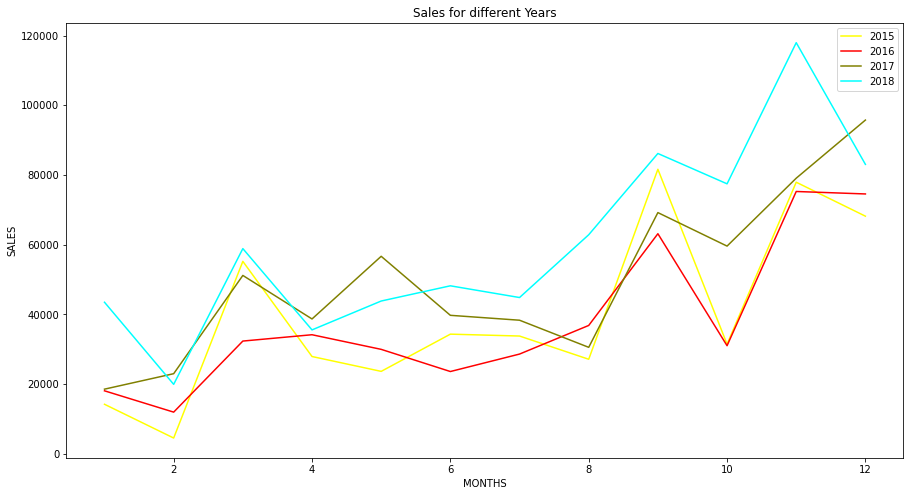

In [234]:
plt.figure(figsize=(15,8))

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array(sales_2015)
plt.plot(x, y , color = '#FFFF00' ,label='2015')

y = np.array(sales_2016)
plt.plot(x, y , color = '#FF0000' ,label='2016')

y = np.array(sales_2017)
plt.plot(x, y , color = '#808000',label='2017')

y = np.array(sales_2018)
plt.plot(x, y , color = '#00FFFF' , label='2018')

plt.title("Sales for different Years")
plt.xlabel("MONTHS")
plt.ylabel("SALES")
plt.legend()
plt.show()

# INSIGHTS:-

# __2015-2018__

Total Sales: -             __$ 2261536.7827__ <br>
Total Orders:-             __9800__ <br>
Average Delivery Day:-     __3 Days__

Maximum Shipping Mode:-     __Standard Class__    ___[5859 orders] (58.79 %)___

__RELATED TO ORDERS COUNT :-__

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer (5101) (52.05%)      |Home Office (1746) (17.82%)   |
| CITY   | New York City (891)        | East Orange (1)      |
| STATE       | California (1946)       | Wyoming (1)   |
| REGION   | West (3140) (32.04%)        | South (1598) (16.31%)     |
| CATEGORY     | Office Supplies (5909) (60.30%)     | Technology (1813) (18.50%)  |
| SUB-CATEGORY   | Blinders (1492)        | Copiers (66)      |
| PRODUCT-NAME      | Staple Envelope (47)       |Acco Glide Clip (1)   |
| CUSTOMER NAME   | William Brown (35)        | Ricardo Emerson(1)      |

__RELATED TO SALES :-__   [IN $]

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer (1148060.53) (50.76%)      |Home Office (424982.18) (18.79%)   |
| CITY   | New York City (252462.55)         | Abilene (1.39)      |
| STATE       | California (446306.46)       | North Dakota (919.91)  |
| REGION   | West (710219.68) (31.40 %)       | South (389151.46) (17.21 %)     |
| CATEGORY     | Technology(827455.87) (36.59%)     |  Office Supplies (705422.33) (31.19%)  |
| SUB-CATEGORY   | Phones (327782.45)       | Fastners (3001.96)      |
| PRODUCT-NAME      | Canon Image Class 2200 (61599.82)       |Eureka Disposal Bag (1.62)   |
| CUSTOMER NAME   | Sean Miller (25043.05)        | Thais Sissman (4.83)      |

___ORDER COUNTS:-___ <br>
Highest   :__2018__    ___(3258) (33.24 %)___  <br>
Lowest    : __2015__    ___(1953) (19.93 %)___ 

1. Most orders are in the month of November around __14.79%__ <br>
2. Least orders are in the month of February around __3.03%__<br>

___SALES:- [in $]___<br>
Highest   :__2018__    ___(722052.02) (31.93%)___ <br>
Lowest    : __2016__   ___(459436.01) (20.32 %)___

1. Though the Maximum orders are made from Office Supplies still it is the category with 
least revenue earned <br>

2. Though Staple Envelope is the product ordered maximum time still Canon Image Class 2200
is the product with the most sales <br>

3. Though William Brown is the customer who ordered the maximum time still  Sean Miller
is the customer from whom the maximum revenue had been genrated <br>

4. Though Blinders in sub-category  are ordered the maximum times still Phones are the product
with most sales


# Year Wise Analysis:- 

# 2015

Total Sales:-  __$ 479856.2081__ <br>
Total Orders:- __1953__ <br>
Average Delivery Day:- __3 days__

__RELATED TO ORDERS COUNT :-__

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer (1045) (53.51 %)      |Home Office(307) (15.72 %)   |
| CITY   |  Los Angeles (153)        | Billings (1)      |
| STATE       | California (404)       | Iowa (2)   |
| REGION   | West (648) (33.18%)        | South (344) (17.61%)     |
| CATEGORY     | Office Supplies (1192) (61.03 %)     | Technology (347) (17.77%)  |
| SUB-CATEGORY   | Blinders (283)        | Copiers (10)      |
| PRODUCT-NAME      | Staple Envelope (14)       |Safco Drafting Table (1)   |
| CUSTOMER NAME   | Sam Craven (16)        | Charles Sheldon (1)|

__RELATED TO SALES :-__ [IN $]

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer (262956.80)  (54.50 %)      |Home Office(89101.91) (18.57 %)   |
| CITY   | New York City (44361.09)         | Boca Raton (4.61)      |
| STATE       | California (89475.15)       |  South Dakota (162.15)  |
| REGION   | West (145907.96) (30.41%)       | Central (102920.52) (21.45 %)     |
| CATEGORY     | Technology (173865.51) (36.23%)     |  Office Supplies (149512.82)  (31.16 %)  |
| SUB-CATEGORY   | Phones (77225.96)       |  Fasteners (655.39)      |
| PRODUCT-NAME      |Cisco TelePreence System (22638.48)       |Avery Round Ring Poly Binders (0.85)   |
| CUSTOMER NAME   | Sean Miller (23661.23)        | Karen Bern (1.87)      |

1. Though the maximum orders are from the city of Los Angles still the highest sales are from New York City. <br>
2. Though the minimum orders are from South Region Still the lowest sales are from Central Region. <br>
3. Though the maximum orders are from category Office Supplies still it earn the lowest sales. <br>
4. Though the maximum orders are from Sub-Category Blinders still the highest sales are earn from Phones. <br>
5. Though Staple Envelope received the maximum orders still the highest sales are earned from the product Cisco TelePreene System. <br>
6. Though Sam Craven have the highest order count, still maximum revenue is earned from Sean Miller.

# 2016

Total Sales:- __$ 459436.0054__ <br>
Total Orders:- __2055__ <br>
Average Delivery Day:- __4 days__ <br>

__RELATED TO ORDERS COUNT :-__

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(1112) (54.11 %)      |Home Office(608) (16.30%)   |
| CITY   |  New York City (199)        | Missoula (1)      |
| STATE       | California (382)       | Vermont (2)   |
| REGION   |  East(626) (30.46 %)        | South (330) (16.06 %)     |
| CATEGORY     | Office Supplies (1210) (58.88 %)     | Technology (405) (19.71%)  |
| SUB-CATEGORY   | Blinders (309)        | Copiers (20)      |
| PRODUCT-NAME      | Staple Envelope (11)       |Xerox 1979 (1)   |
| CUSTOMER NAME   | Peter Fuller(16)        | Doug O'Connell(1)|

__RELATED TO SALES :-__ [IN $]

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(265356.29) (57.76 %)      | Home Office(74404.11) (16.19 %)   |
| CITY   | New York City(67506.13)         | Tempe(3.37)|
| STATE       | California(85621.58)       |  Maine(106.08)  |
| REGION   | East(153225.18) (33.35 %)       | South(0076.08) ( 15.25 %)     |
| CATEGORY     | Furniture(164053.87) (35.71 %)     |  Office Supplies(133124.41) (28.98 %)  |
| SUB-CATEGORY   | Chairs(70654.67)       |  Fasteners (545.22)      |
| PRODUCT-NAME      |Fellowes PB500 Electric(15760.28)       |Avery Triangle Shaped Sheet Lifters(0.98)   |
| CUSTOMER NAME   | Petter Fuller(9022.32)        | Cari Schnelling(1.72)      |

1. Though the city of Missoula has the least order count still the city Tempe has the least revenue generated.<br>
2. Though in category office supplies has the maximum order still it generates the least sales among oher category.<br>
3. Though in sub-category Blinders have the maximum order count still Chairs have earned the maximum sales.<br>
4. Though the product Staple Envelope have been sold the most still the maximum sales have been earned from Fellowes PB500 Electric. <br>

# 2017

Total Sales:- __$ 600192.55__ <br>
Total Orders:- __2534__ <br>
Average Delivery Day:- __3 days__ <br>

__RELATED TO ORDERS COUNT :-__

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(1304) (51.46 %)      |Home Office(455) (17.96 %)   |
| CITY   |  New York City (248)        | Lansing (1)      |
| STATE       | California (508)       | Wyoming (1)   |
| REGION   |  West (787) (31.06 %)        | South(411) (16.22 %)     |
| CATEGORY     | Office Supplies (1537) (60.66 %)     | Technology (450) (17.76 %)  |
| SUB-CATEGORY   | Blinders (408)        | Copiers (14)      |
| PRODUCT-NAME      | Staple Envelope (11)       |Lock-Up Easel 'Spel-Binder' (1)   |
| CUSTOMER NAME   | Jonathan Doherty (21)        | Duane Benoit(1)|

__RELATED TO SALES :-__ [IN $]

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(291142.97) (48.51 %)      | Home Office(104072.27) ( 17.34 %)   |
| CITY   |Los Angeles(55273.12)         | Cuyahoga Falls(2.21)|
| STATE       | California(126542.96)       |  New Mexico(64.08)  |
| REGION   | West(182471.23) (30.40 %)       | South(98535.90) ( 15.58 %)     |
| CATEGORY     | Technology(221961.94) ( 36.98 %)     |  Office Supplies(182417.57) ( 30.39 %)  |
| SUB-CATEGORY   | Chairs(81930.34)       |  Fasteners (946.27)      |
| PRODUCT-NAME      |Canon image Class 2200(25899.93)       |Newell 310(1.41)   |
| CUSTOMER NAME   | Tamara Chand(18344.05)        | Sarah Jordon(1.96)      |

1. Though the New York City have the maximum orders count still Los Angeles have the maximum sales. <br>
2. Though the state Woming have the least order count of 1 order still the state of New Mexico have provided the least sales. <br>
3. Though Office Supplies have the maximum order counts still the Technology category have the highest sales among the category. <br>
4. Though blinders were ordered the maximum but still chairs have the maximum sales. <br>
5. Staple Envelope being the most ordered product but the maximum sales is from Canon Image class 2200. <br>
6. Jonathan Doherty ordered the most time but still the Tamara Chand generated the maximum revenue.

# 2018

Total Sales:- __$ 722052.0192__ <br>
Total Orders:- __3258__ <br>
Average Delivery Day:- __3 days__ <br>

__RELATED TO ORDERS COUNT :-__

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(1640) (50.34%)      |Home Office(649) (19.92%)   |
| CITY   |  New York City (303)        | East Orange (1)      |
| STATE       | California (652)       | District of Columbia (2)   |
| REGION   |  West (1080) (33.15%)        | South(513) ( 15.75%)     |
| CATEGORY     | Office Supplies (1970) (60.47%)     | Technology(611) (18.75%)  |
| SUB-CATEGORY   | Blinders (492)        | Copiers (22)      |
| PRODUCT-NAME      | Easy-staple paper (16)       |Bagged Rubber Bands (1)   |
| CUSTOMER NAME   | Seth Vernon (20)        | Jill Matthias(1)|

__RELATED TO SALES :-__ [IN $]

| FEATURES      | MAXIMUM | MINIMUM     |
| :---        |    :----:   |          ---: |
| SEGMENT      |  Consumer(328604.47) (45.51%)      | Home Office(157403.88) (45.51 %)   |
| CITY   |New York City(86788.77)         | Abilene(1.39)|
| STATE       | California(144666.77)       |  District of Columbia(77.76)  |
| REGION   | West(248130.93) (34.36 %)       | South(122164.57) (19.61 %)     |
| CATEGORY     | Technology(269370.69) (37.31 %)     |  Furniture (212313.79) (29.40 %)  |
| SUB-CATEGORY   | Phones(104685.66)       |  Fasteners (855.07)      |
| PRODUCT-NAME      |Canon image Class 2200(35699.90)       |Hoover Commercial Lightweight(1.39)   |
| CUSTOMER NAME   | Raymond Buch(14203.28)        | Pamela Coakley(1.19)|

1. Though East Orange city have only 1 order count still the city of Abilene have the least sales. <br>
2. Though the category Office Supplies have the most order counts still Technology produce the maximum sales among the category. <br>
3. Blinders are most ordered still Phones have the maximum sales.
4. Easy-Staple-paper is the most ordered product still Canon image Class 2200 have the maximum sales. <br>
5. Seth Vernon ordered the maximum products but still from Raymond Buch maximum revenue have been generated. 

# OTHER INSIGHTS:-
1. We can Rule out the fact the more order counts means more sales. <br>
2. __Staple Evelope__ is the __most selling product__. <br>
3. __Canon Image class 2200__ is the product from which the __maximum revenue__ have been earned. <br>
4. __William Brown__ have odered the __maximum times__
5. __Sean Miller__ is the customer from whcih the maximum revenue have been genarted.<br>
6. __Year 2018__ is the __best year__ in term of no of orders and sales.<br>
7. __November__ is the month where the __most order__ have been placed. <br>
8. In the month of __February__ the __least order__ are been placed, over here we can introduce some sale so the customers buys more product. <br>
9. In the month of __October__ there is always a __down-fall__ in the sales curve for every year. <br>
10. Along side every __starting of the year__ there is __down-fall__ if the sales also.<br>
11. From __Consumer__ segment about __50 %__ of the sales is generated. <br>
12. __New York__ city have the __maximum orders__ . <br>
13. __California__ have the __highest__ sales among all other states. 
14. In the state of __District of Columbia__, __New Mexico__,__Iowa__, etc some sales should be applie so that that customer order more products as both the __sales and the order count are least__ in these states.<br> 
15. The Order Counts are increasing __Every Year__. <br>
16. The __Sales__ is also increasing every year after __2016__. <br>